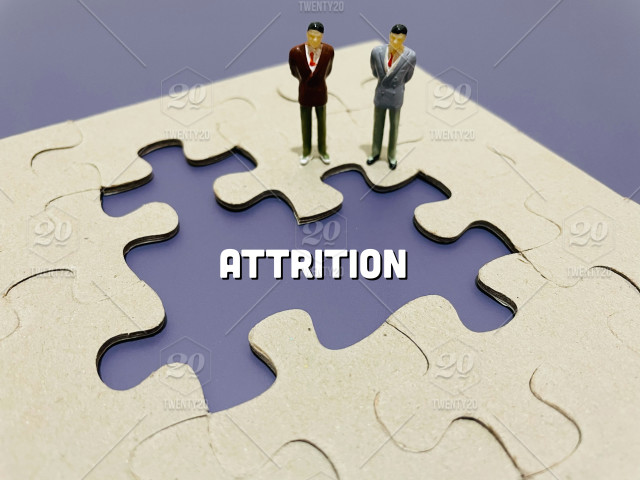

Commonly referred to as a ‘churn rate,’ a company’s attrition rate is the rate at which people leave. If you break it down, it is the number of people who have left the company, divided by the average number of employees over a period of time. Typically, it is expressed as a percentage (%).
- client for this project is the HR Department at a software company.
- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
They only want to deal with the data that is related to permanent employees.
- Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

This suffers from the following problems:

This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
The second problem is these insights can't be aggregated and interlaced across all employees who have left.
The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.

**SQL Database with provided datatables and features**

**department_data**

- This dataset contains information about each department. The schema of the dataset is as follows:

- dept_id – Unique Department Code
- dept_name – Name of the Department
- dept_head – Name of the Head of the Department

**employee_details_data**
- This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

- employee_id – Unique ID Number for each employee
- age – Age of the employee
- gender – Gender of the employee
- marital_status – Marital Status of the employee

**employee_data**
- This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

**Target variable**

- status – Current employment status (Employed / Left)

**Administrative information**

- department – Department to which the employees belong(ed) to
- salary – Salary level with respect to rest of their department
- tenure – Number of years at the company
- recently_promoted – Was the employee promoted in the last 3 years?
- employee_id – Unique ID Number for each employee

**Workload information**

- n_projects – Number of projects employee has worked on
- avg_monthly_hrs – Average number of hours worked per month

**Mutual evaluation information**

- satisfaction – Score for employee’s satisfaction with the company (higher is better)
- last_evaluation – Score for most recent evaluation of employee (higher is better)
- filed_complaint – Has the employee filed a formal complaint in the last 3 years?


**Problem deliverables**
- Classification model Deliverable: Predict whether an employee will stay or leave.

In [1]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector
import pandas as pd
import numpy as np
from collections import Counter
import pandas_profiling
import matplotlib.pyplot as plt  
import seaborn as sns            
%matplotlib inline
sns.set()

In [3]:
# connection details
cnx = mysql.connector.connect(
   host="cpanel.insaid.co",
   user="student",
   passwd="student",
   database='Capstone2'
)

In [4]:

    query1 = "Select * from department_data;"
    query2 = "Select * from employee_details_data;"
    query3 = "Select * from employee_data;"
    df_department_data = pd.read_sql(query1,cnx)
    df_employee_details_data = pd.read_sql(query2,cnx)
    df_employee_data = pd.read_sql(query3,cnx)
    cnx.close() #close the connection


In [5]:
df_employee_data.shape

(14150, 11)

In [6]:
df_employee_details_data.shape

(14245, 4)

In [7]:
df_department_data.shape

(11, 3)

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
missing_data(df_employee_data)

,Total,Percent
recently_promoted,13853,97.901060
filed_complaint,12104,85.540636
last_evaluation,1487,10.508834
department,707,4.996466
satisfaction,150,1.060071
tenure,150,1.060071
avg_monthly_hrs,0,0.000000
n_projects,0,0.000000
salary,0,0.000000
status,0,0.000000


# observations
- missing 98% recently_promoted, anyways good news in employee_details_data, no missing of employee_id
- next 85% filed_complaint values missing, so this being important data to understand why these employees left , very unfortunate
- additionally, the last evaluation had 10.5% missing values , which is also important piece of info with regard people leaving a company
- department values are a clear important , is it related to a particular manager , so ~5% values went missing in this, still manageable
- satisfaction and tenure also has about 1% values and this actually looks like we have same rows having null values in both columns

In [10]:
missing_data(df_employee_details_data)

,Total,Percent
employee_id,0,0.0
age,0,0.0
gender,0,0.0
marital_status,0,0.0


In [11]:
missing_data(df_department_data)

,Total,Percent
dept_id,0,0.0
dept_name,0,0.0
dept_head,0,0.0


In [12]:
df_department_data.describe(include='all')

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-PD,Support,Evelyn Tolson
freq,1,1,1


In [13]:
df_department_data.head(5)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [14]:
df_employee_details_data.describe(include='all')

,employee_id,age,gender,marital_status
count,14245.000000,14245.000000,14245,14245
unique,NaN,NaN,2,2
top,NaN,NaN,Male,Unmarried
freq,NaN,NaN,9382,7283
mean,112123.050544,32.889926,NaN,NaN
std,8500.457343,9.970834,NaN,NaN
min,100101.000000,22.000000,NaN,NaN
25%,105775.000000,24.000000,NaN,NaN
50%,111298.000000,29.000000,NaN,NaN
75%,116658.000000,41.000000,NaN,NaN


In [15]:
df_employee_data.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,14150.000000,13443,2046.0,12663.000000,14150.000000,297.0,14150,14000.000000,14150,14000.000000,14150.000000
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN
top,NaN,D00-SS,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN,NaN
freq,NaN,3905,NaN,NaN,NaN,NaN,6906,NaN,10784,NaN,NaN
mean,199.994346,NaN,1.0,0.718399,3.778304,1.0,NaN,0.621212,NaN,3.499357,112080.750247
std,50.833697,NaN,0.0,0.173108,1.250162,0.0,NaN,0.250482,NaN,1.462584,8748.202856
min,49.000000,NaN,1.0,0.316175,1.000000,1.0,NaN,0.040058,NaN,2.000000,0.000000
25%,155.000000,NaN,1.0,0.563711,3.000000,1.0,NaN,0.450356,NaN,3.000000,105772.500000
50%,199.000000,NaN,1.0,0.724731,4.000000,1.0,NaN,0.652394,NaN,3.000000,111291.500000
75%,245.000000,NaN,1.0,0.871409,5.000000,1.0,NaN,0.824925,NaN,4.000000,116650.750000


**Observations**
- employee data has  is 14150 rows and 11 Columns while employee details have 14245 rows and 4 columns so 95 missing rows in employee data with respect to employee details.

In [16]:
df_employee_data.head(500)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707
...,...,...,...,...,...,...,...,...,...,...,...
495,147.0,D00-SS,NaN,NaN,2,NaN,medium,0.403552,Left,3.0,129295
496,308.0,None,NaN,0.899341,7,NaN,medium,0.087158,Left,5.0,126051
497,297.0,None,NaN,0.845922,6,NaN,medium,0.108951,Left,4.0,114153
498,158.0,D00-SP,NaN,0.524137,2,NaN,medium,0.450892,Left,3.0,112651


In [17]:
df_employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


**Observations**
  - Filed complaint should be int.
  -  Recently promoted should be object
  -  Salary should be Float.


In [18]:
Insaid_unseen=pd.read_csv('GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv')

In [19]:
Insaid_unseen.head(3)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924


In [20]:
Insaid_unseen.isnull().sum()

avg_monthly_hrs       0
department            2
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
employee_id           0
dtype: int64

In [21]:
df_employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [22]:
df_employee_details_data.gender.value_counts()

Male      9382
Female    4863
Name: gender, dtype: int64

# observations
- twice the amounts of Male

In [23]:
age_counts=df_employee_details_data.age.value_counts()

In [24]:
age_counts

24    1319
25    1255
23    1209
22    1175
27     674
29     669
28     651
26     633
42     306
37     285
47     281
32     281
33     280
46     277
39     275
30     275
48     274
40     273
36     271
38     270
41     270
45     266
43     265
35     264
52     254
44     252
34     247
49     244
53     236
50     236
51     228
31     228
54     227
55      38
57      34
56      23
Name: age, dtype: int64

# observations
- age distribution from 25 to 56 years
- very high number of employees were younger and few older employees are present

Text(0, 0.5, 'Ages')

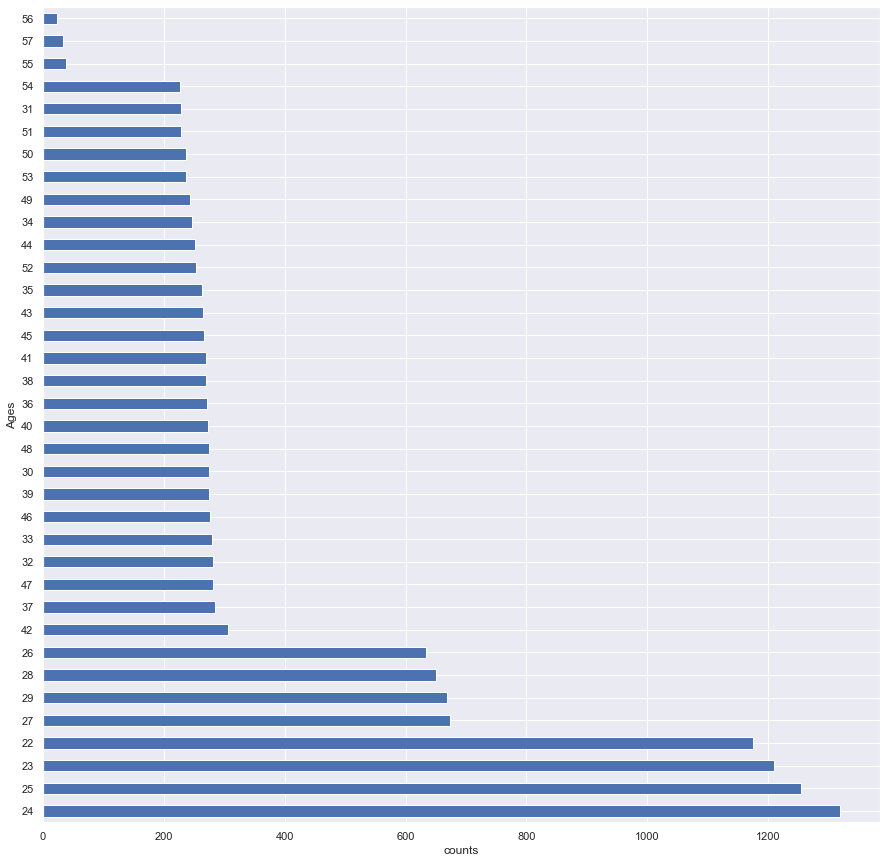

In [25]:
# employee count in age wise to see which age has max number
plt.figure(figsize=(15,15))
df_employee_details_data.age.value_counts().plot.barh()
plt.xlabel("counts")
plt.ylabel("Ages")

Text(0.5, 0, 'Age')

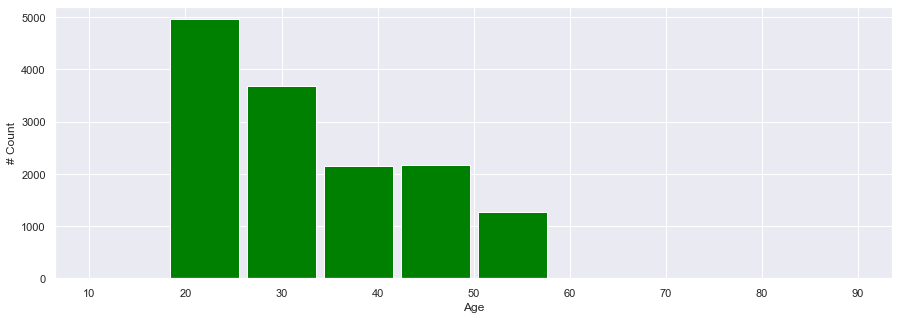

In [26]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_employee_details_data['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

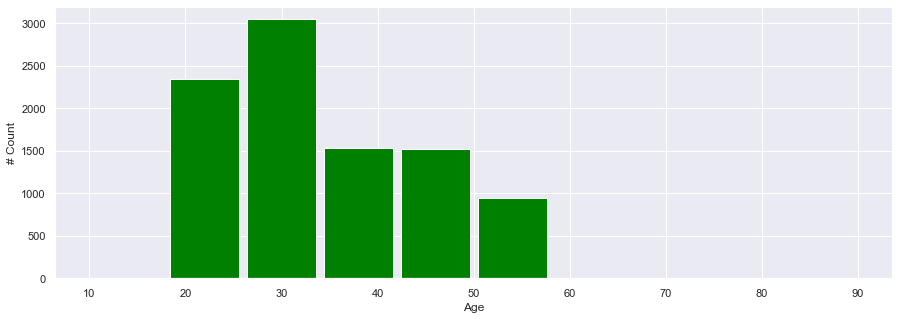

In [27]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_employee_details_data[df_employee_details_data['gender']=='Male']['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

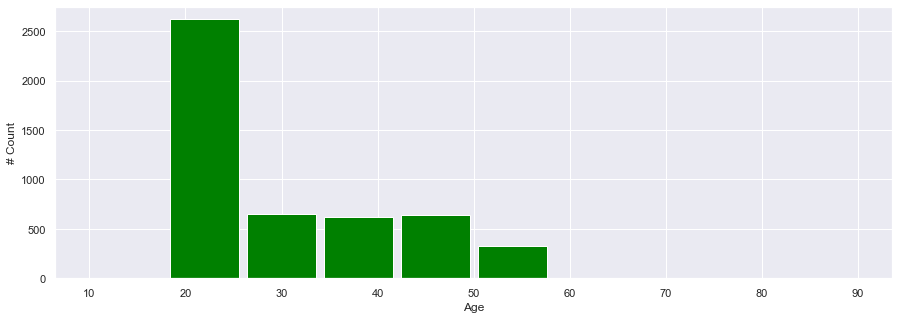

In [28]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_employee_details_data[df_employee_details_data['gender']=='Female']['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

# observations
- could be that Women are churning out more after marriage ?

In [29]:
df_employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


Text(0.5, 0, 'Age')

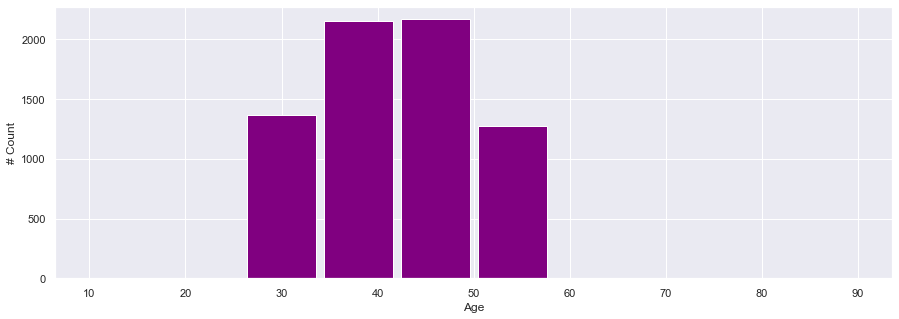

In [30]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_employee_details_data[df_employee_details_data['marital_status']=='Married']['age'], 10, range, color = 'Purple', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

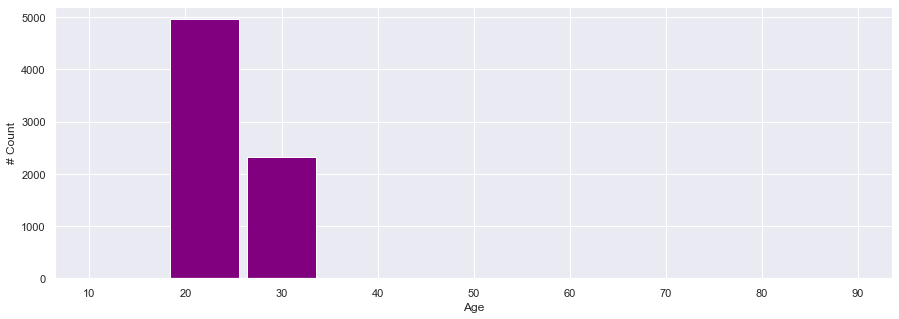

In [31]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_employee_details_data[df_employee_details_data['marital_status']=='Unmarried']['age'], 10, range, color = 'Purple', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

Text(0, 0.5, 'marital_status')

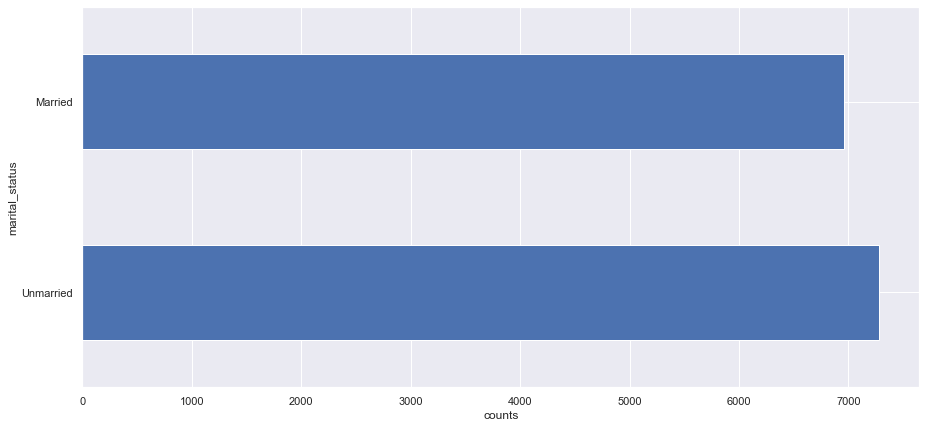

In [32]:
# employee count in age wise to see which age has max number
plt.figure(figsize=(15,7))
df_employee_details_data.marital_status.value_counts().plot.barh()
plt.xlabel("counts")
plt.ylabel("marital_status")



**Observations** 
1. People of age group 25 to 56 are present.
2. Mojority of people are Males (~2 times as females).
3. Males and females unmarried are more in ages of 20 to 30, beyond 30 all are married 
4. Employees numbers are almost equally married and unmarried 



In [33]:
# importing sweetviz
import sweetviz as sv

In [34]:
#analyzing the dataset
df_employee_details_data_report = sv.analyze(df_employee_details_data)
#display the report
df_employee_details_data_report.show_html('df_employee_details_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report df_employee_details_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [35]:
#analyzing the dataset
df_employee_data_report = sv.analyze(df_employee_data)
#display the report
df_employee_data_report.show_html('df_employee_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report df_employee_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
#analyzing the dataset
df_department_data_report = sv.analyze(df_department_data)
#display the report
df_department_data_report.show_html('df_employee_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report df_employee_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Observations**
-	InTenure- 78% of the employees were 3 years and above with the company, with about ~1% in 7, 8 and 10 years respectively
-	From status column we can see that 24% employees of total have left 
-	Employee satisfaction seems to be negatively skewed in distribution
-	~50% had low salaries, 43% had medium salary and 8% people had high salary, salary being an important factor in churning of employees
-	About 297 have been promoted ~1%
-	Interestingly, higher number of projects were highly related to satisfaction and not so interestingly to average working hours which directly impacted their last Evaluation to a medium degree
-	57% employees had 4 -7 projects with ~30% with 4 projects and 2% had 7 projects
-	11 departments with 11 heads and about 29% employees in D00-SS department rest  19,16 and 1% are distributed respectively D00-Eng, D00-SP 
-	Department seems to correlate highly with employee satisfaction, good point to note and it correlates to evaluation and working hours , but keep in mind this is only mere 2% of employee id correlation


In [37]:
#Performing inner join as 
#(between two pandas DataFrames will result into a set of records that have a mutual value in the specified joining column)
df_employee = df_employee_data.merge(df_employee_details_data ,on='employee_id')

In [38]:
df_employee.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42,Female,Married
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24,Female,Unmarried
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51,Female,Married
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23,Female,Unmarried


In [39]:
df_employee.shape

(14145, 14)

In [40]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  float64
 1   department         13439 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12658 non-null  float64
 4   n_projects         14145 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14145 non-null  object 
 7   satisfaction       13995 non-null  float64
 8   status             14145 non-null  object 
 9   tenure             13995 non-null  float64
 10  employee_id        14145 non-null  int64  
 11  age                14145 non-null  int64  
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


**observations**
- #5 employee ids and records missing
- rest retained as such, by inner join merged via emp_id

In [41]:
df_employee.isnull().any()

avg_monthly_hrs      False
department            True
filed_complaint       True
last_evaluation       True
n_projects           False
recently_promoted     True
salary               False
satisfaction          True
status               False
tenure                True
employee_id          False
age                  False
gender               False
marital_status       False
dtype: bool

In [42]:
#Drop unwanted observations on merged employee dataset
#Drop Duplicates
df_employee.drop_duplicates(inplace=True)
#Drop unwanted observations of Temp department
df_employee.drop(df_employee.loc[df_employee['department'] == 'D00-TP'].index, inplace=True)

print(df_employee.shape)

(13966, 14)


In [43]:
#merge the merged employee table with department dataset
#company_details_merged = pd.merge(employees_details_merged, df_department_data, left_on='department', right_on='dept_id', how='inner')

In [44]:
#df_employee_final.head()

# week 2
#Points that might be of use are:
1. 	Drop unwanted observations
2. 	Fix structural errors
3. 	Handle missing data
4. Exploratory Data Analysis
5. 	Engineer features

In [45]:
#Drop unwanted observations
#Drop Duplicates
#df_employee_data.drop_duplicates(inplace=True)
#Drop unwanted observations of Temp department
#df_employee_data.drop(df_employee_data.loc[df_employee_data['department'] == 'D00-TP'].index, inplace=True)

#print(df_employee_data.shape)


<AxesSubplot:>

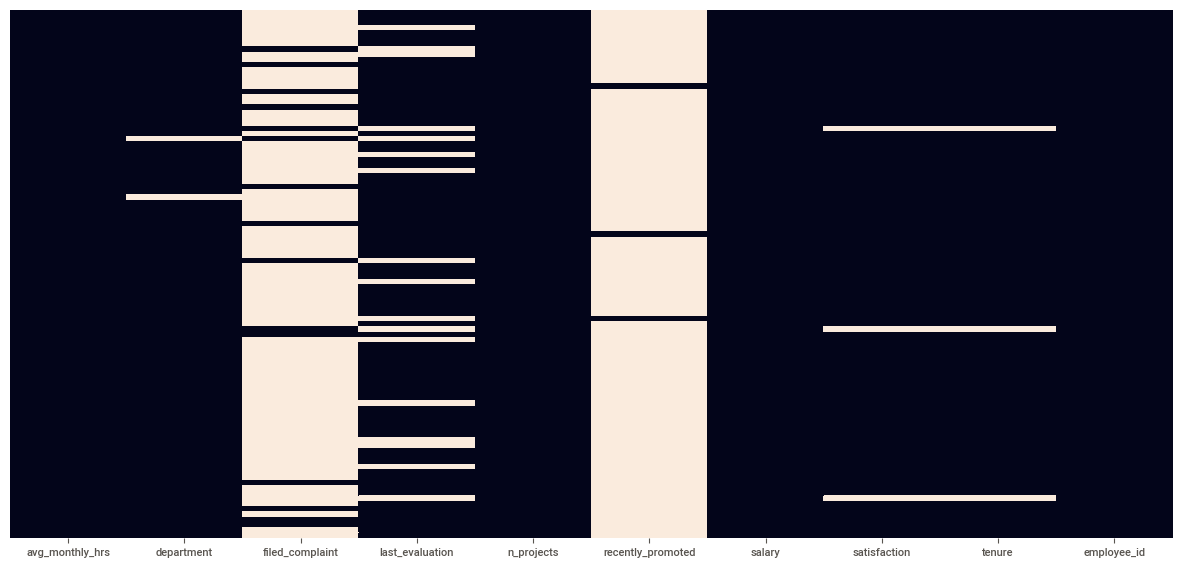

In [46]:
#null values visualization
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(Insaid_unseen.isnull(), cbar=False, yticklabels=False)

In [47]:
#nulls in unseen data has to be dropped , so dropping cols filed_complaint,recently_promoted
#Insaid_unseen.drop(['filed_complaint', 'recently_promoted'], axis = 1,inplace=True)

In [48]:
Insaid_unseen.shape

(100, 10)

In [49]:
#dropping off rows
#Insaid_unseen.dropna(inplace=True)

In [50]:
Insaid_unseen.isnull().any()

avg_monthly_hrs      False
department            True
filed_complaint       True
last_evaluation       True
n_projects           False
recently_promoted     True
salary               False
satisfaction          True
tenure                True
employee_id          False
dtype: bool

In [51]:
df_employee['department'].unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-FN', '-IT'], dtype=object)

In [52]:
#Fix structural errors
df_employee['recently_promoted'].value_counts()

1.0    297
Name: recently_promoted, dtype: int64

In [53]:
#zero filling for missing values
df_employee['recently_promoted'].fillna(0,inplace = True)

In [54]:
df_employee['recently_promoted'].value_counts()

0.0    13669
1.0      297
Name: recently_promoted, dtype: int64

In [55]:
Insaid_unseen['recently_promoted'].fillna(0,inplace = True)

In [56]:
df_employee['filed_complaint'].fillna(0,inplace = True)

In [57]:
Insaid_unseen['filed_complaint'].fillna(0,inplace = True)

In [58]:
Insaid_unseen.shape

(100, 10)

In [59]:
df_employee['filed_complaint'].value_counts()

0.0    11954
1.0     2012
Name: filed_complaint, dtype: int64

### Convert the categorical variable `gender` , 'status' and 'marital_status' to binary (0 and 1 values) using the map function. 

In [60]:
def generate():
    
    df_employee['gender']= df_employee['gender'].map({'Female': 0, 'Male': 1})
    return df_employee['gender']
df_employee['gender'] = generate()
df_employee['gender'].value_counts()

1    9181
0    4785
Name: gender, dtype: int64

In [61]:
def generate():
    
    df_employee['marital_status']= df_employee['marital_status'].map({'Married': 0, 'Unmarried': 1})
    return df_employee['marital_status']
df_employee['marital_status'] = generate()
df_employee['marital_status'].value_counts()

1    7062
0    6904
Name: marital_status, dtype: int64

In [62]:
df_employee['status'].value_counts()

Employed    10631
Left         3335
Name: status, dtype: int64

In [63]:
def generate():
    
    df_employee['status']= df_employee['status'].map({'Employed': 0, 'Left': 1})
    return df_employee['status']
df_employee['status'] = generate()
df_employee['status'].value_counts()

0    10631
1     3335
Name: status, dtype: int64

# OHE encoding

In [64]:
# Creating dummy variables for the variable 'salary'. 
sal_ohe = pd.get_dummies(df_employee['salary'], prefix='SAL',drop_first=True)

# Adding the results to the master dataframe
df_employee = pd.concat([df_employee,sal_ohe], axis=1)
df_employee.drop("salary",axis=1, inplace=True)
#drug_test = pd.concat([drug_test,s_m2], axis=1)
df_employee.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,age,gender,marital_status,SAL_low,SAL_medium
0,246.0,None,0.0,0.866838,6,0.0,0.134415,1,4.0,124467,42,0,0,0,1
1,134.0,None,0.0,0.555718,2,0.0,0.511041,1,3.0,112210,23,0,1,1,0
2,156.0,D00-SS,1.0,0.474082,2,0.0,0.405101,1,3.0,126150,24,0,1,0,1
3,256.0,D00-SP,0.0,0.961360,6,0.0,0.152974,1,4.0,125346,51,0,0,1,0
4,146.0,D00-SS,0.0,0.507349,2,0.0,0.434845,1,3.0,113707,23,0,1,0,1


In [65]:
# Creating dummy variables for the variable 'BP'. 
sal_unseen_ohe = pd.get_dummies(Insaid_unseen['salary'], prefix='SAL',drop_first=True)

# Adding the results to the master dataframe
Insaid_unseen = pd.concat([Insaid_unseen,sal_unseen_ohe], axis=1)
Insaid_unseen.drop("salary",axis=1, inplace=True)
#drug_test = pd.concat([drug_test,s_m2], axis=1)
Insaid_unseen.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,SAL_low,SAL_medium
0,134,D00-IT,0.0,0.528841,2,0.0,0.400464,3.0,119045,1,0
1,221,D00-PD,0.0,0.784561,2,0.0,0.759513,3.0,112223,1,0
2,156,D00-SS,0.0,0.545183,2,0.0,0.336457,3.0,103924,0,1
3,133,D00-PR,0.0,NaN,4,0.0,0.832039,2.0,105922,0,1
4,135,D00-SS,0.0,0.454637,2,0.0,0.320723,5.0,103297,1,0


# categorical data mapping for imputing Categorical variable

In [66]:
#string replace the department id from -IT to D00-IT
df_employee['department']=df_employee['department'].replace ("-IT", "D00-IT")

In [67]:
df_employee.shape

(13966, 15)

In [68]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13966 entries, 0 to 14144
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13260 non-null  object 
 2   filed_complaint    13966 non-null  float64
 3   last_evaluation    12629 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  float64
 6   satisfaction       13966 non-null  float64
 7   status             13966 non-null  int64  
 8   tenure             13966 non-null  float64
 9   employee_id        13966 non-null  int64  
 10  age                13966 non-null  int64  
 11  gender             13966 non-null  int64  
 12  marital_status     13966 non-null  int64  
 13  SAL_low            13966 non-null  uint8  
 14  SAL_medium         13966 non-null  uint8  
dtypes: float64(6), int64(6), object(1), uint8(2)
memory usage: 1.5+ MB


In [69]:
df_employee['department'].value_counts().sort_values(False)

D00-PR      173
D00-AD      175
D00-MN      590
D00-FN      722
D00-MT      812
D00-PD      853
D00-IT     1359
D00-SP     2108
D00-ENG    2573
D00-SS     3895
Name: department, dtype: int64

In [70]:
df_employee['department'].unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-FN'], dtype=object)

In [71]:
#string replace the department id from -IT to D00-IT
Insaid_unseen['department']=Insaid_unseen['department'].replace ("-IT", "D00-IT")

<AxesSubplot:>

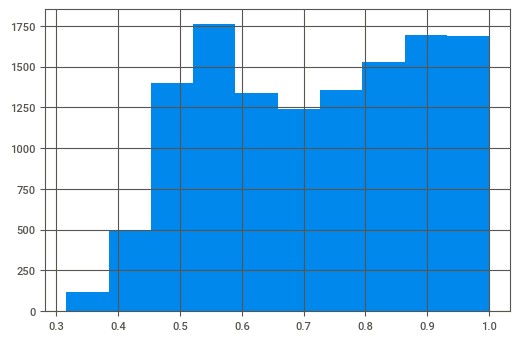

In [72]:
df_employee['last_evaluation'].hist()

In [73]:
df_employee['last_evaluation'].interpolate(inplace=True)

<AxesSubplot:>

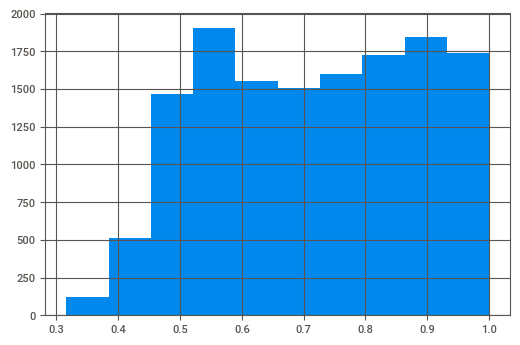

In [74]:
df_employee['last_evaluation'].hist()

In [75]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13966 entries, 0 to 14144
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13260 non-null  object 
 2   filed_complaint    13966 non-null  float64
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  float64
 6   satisfaction       13966 non-null  float64
 7   status             13966 non-null  int64  
 8   tenure             13966 non-null  float64
 9   employee_id        13966 non-null  int64  
 10  age                13966 non-null  int64  
 11  gender             13966 non-null  int64  
 12  marital_status     13966 non-null  int64  
 13  SAL_low            13966 non-null  uint8  
 14  SAL_medium         13966 non-null  uint8  
dtypes: float64(6), int64(6), object(1), uint8(2)
memory usage: 1.5+ MB


<AxesSubplot:>

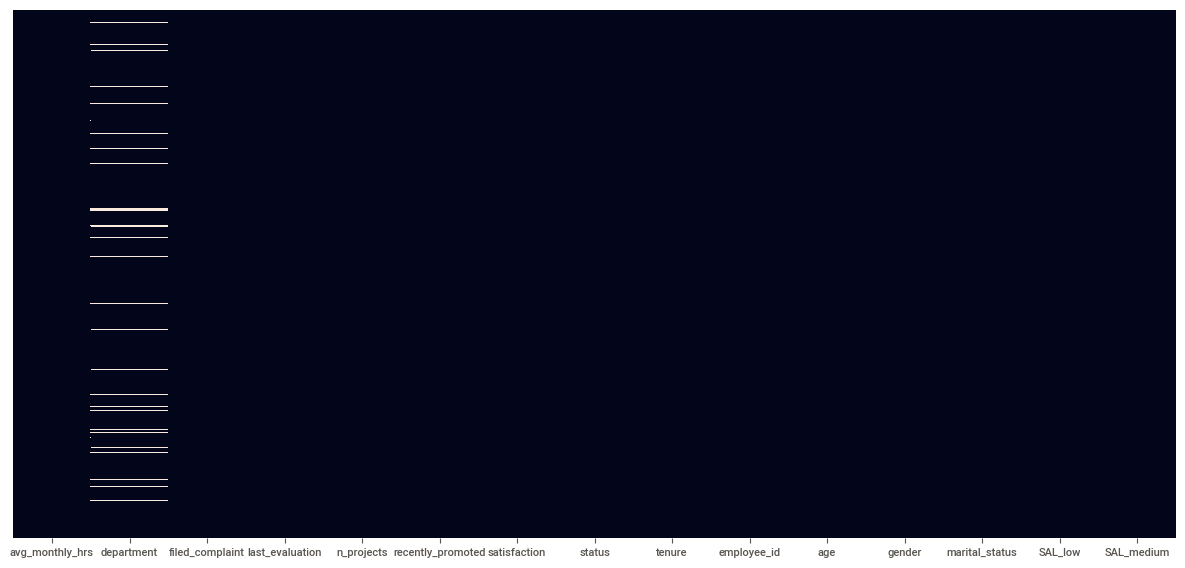

In [76]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df_employee.isnull(), cbar=False, yticklabels=False)

In [77]:
Insaid_unseen['last_evaluation'].interpolate(inplace=True)

In [78]:
Insaid_unseen['department'].fillna(Insaid_unseen['department'].mode()[0],inplace=True)

In [79]:
Insaid_unseen['tenure'].fillna(Insaid_unseen['tenure'].mode()[0],inplace=True)

In [80]:
Insaid_unseen['satisfaction'].fillna(Insaid_unseen['satisfaction'].mean(),inplace=True)

In [81]:
Insaid_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   satisfaction       100 non-null    float64
 7   tenure             100 non-null    float64
 8   employee_id        100 non-null    int64  
 9   SAL_low            100 non-null    uint8  
 10  SAL_medium         100 non-null    uint8  
dtypes: float64(5), int64(3), object(1), uint8(2)
memory usage: 7.4+ KB


In [82]:
#df1.merge(df2, left_on='id', right_on='colF')

df_employee_final=pd.merge(df_employee,df_department_data,left_on='department', right_on='dept_id', how='inner')

df_employee_final.info()


In [83]:
df_employee_final['department'].unique()

array(['D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-FN'], dtype=object)

**Observations**
- no nan values after merging with department , interesting!!!

In [84]:
df_employee_final.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
satisfaction         0
status               0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
SAL_low              0
SAL_medium           0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

<AxesSubplot:>

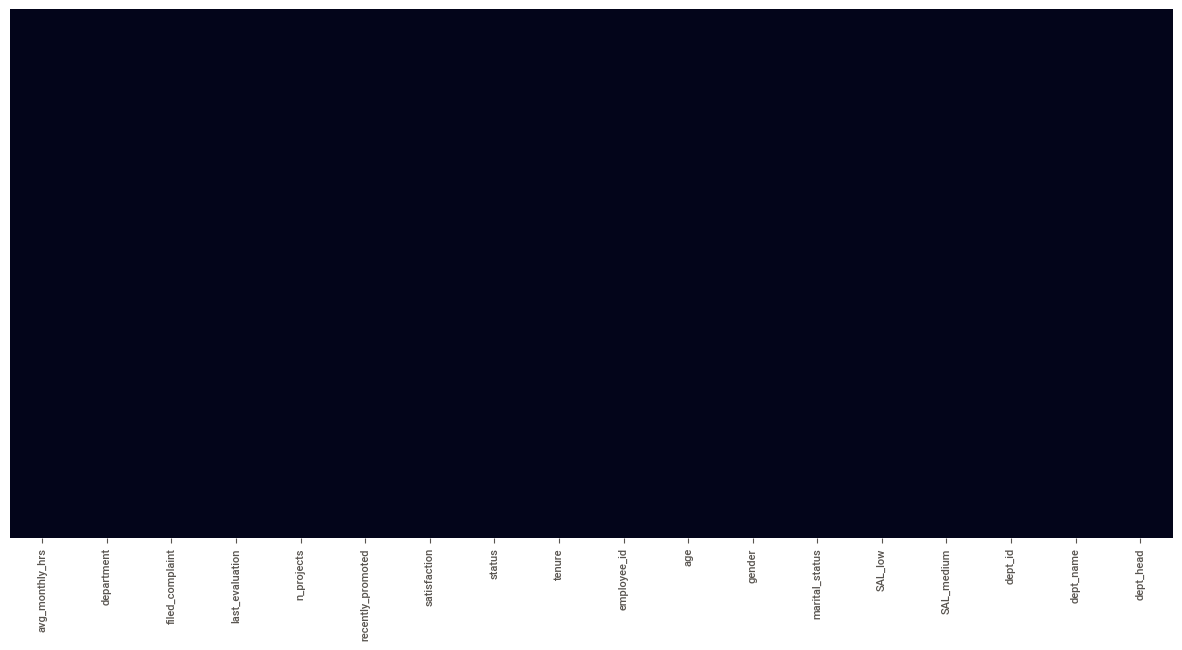

In [85]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df_employee_final.isnull(), cbar=False, yticklabels=False)

**observations**
- mergining afterwards the department id paid off
- great now can work on the eda anlaysis 

In [86]:
df_employee_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,age,gender,marital_status,SAL_low,SAL_medium,dept_id,dept_name,dept_head
0,156.0,D00-SS,1.0,0.474082,2,0.0,0.405101,1,3.0,126150,24,0,1,0,1,D00-SS,Sales,Edward J Bayley
1,146.0,D00-SS,0.0,0.507349,2,0.0,0.434845,1,3.0,113707,23,0,1,0,1,D00-SS,Sales,Edward J Bayley
2,281.0,D00-SS,0.0,0.907965,6,0.0,0.105749,1,4.0,122394,50,0,0,0,1,D00-SS,Sales,Edward J Bayley
3,269.0,D00-SS,0.0,0.959077,4,0.0,0.960757,1,5.0,126860,25,0,1,0,1,D00-SS,Sales,Edward J Bayley
4,256.0,D00-SS,0.0,0.897617,5,0.0,0.753731,1,5.0,110655,24,0,1,0,1,D00-SS,Sales,Edward J Bayley


In [87]:
df_employee_final['department'].unique()

array(['D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-FN'], dtype=object)

In [88]:
#Change department, categorical variable to number
#df_employee_final['department'] = df_employee_final['department'].map({'D00-FN':10,'D00-PR':9,'D00-ENG':8,'D00-MN':7,'D00-AD':6,'D00-IT':5,'D00-PD':4, 'D00-MT':3,'D00-SP':2,'D00-SS':1})

In [89]:
df_employee_final['department'].unique()

array(['D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-FN'], dtype=object)

In [90]:
#Change department, categorical variable to number
Insaid_unseen['department'].unique()

array(['D00-IT', 'D00-PD', 'D00-SS', 'D00-PR', 'D00-FN', 'D00-MT',
       'D00-MN', 'D00-ENG', 'D00-SP', 'D00-TP', 'D00-AD'], dtype=object)

In [91]:
#Change department, categorical variable to number
#Insaid_unseen['department'] =Insaid_unseen['department'].map({'D00-FN':10,'D00-PR':9,'D00-ENG':8,'D00-MN':7,'D00-AD':6,'D00-IT':5,'D00-PD':4, 'D00-MT':3,'D00-SP':2,'D00-SS':1})

In [92]:
Insaid_unseen['department'].unique()

array(['D00-IT', 'D00-PD', 'D00-SS', 'D00-PR', 'D00-FN', 'D00-MT',
       'D00-MN', 'D00-ENG', 'D00-SP', 'D00-TP', 'D00-AD'], dtype=object)

# Exploratory Data Analysis

 **Which Manager had high employee turnover?**
 - It is important to find which manager had high turnover?

In [93]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

<AxesSubplot:>

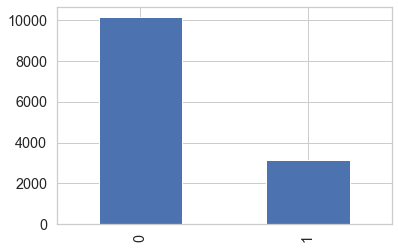

In [94]:
df_employee_final['status'].value_counts().plot.bar()



<AxesSubplot:>

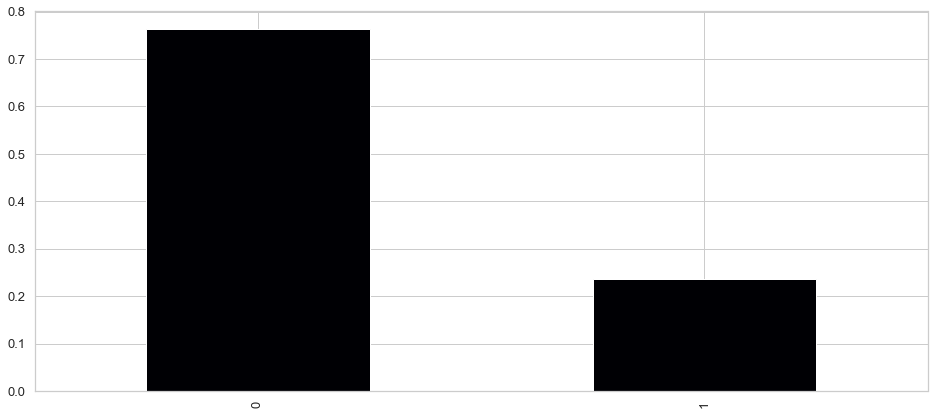

In [95]:
#proportions of employees who stayed and left
(df_employee_final['status'].value_counts() / len(df_employee_final['status'])).plot(kind='bar', figsize=(16,7), colormap='magma', fontsize=13)

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


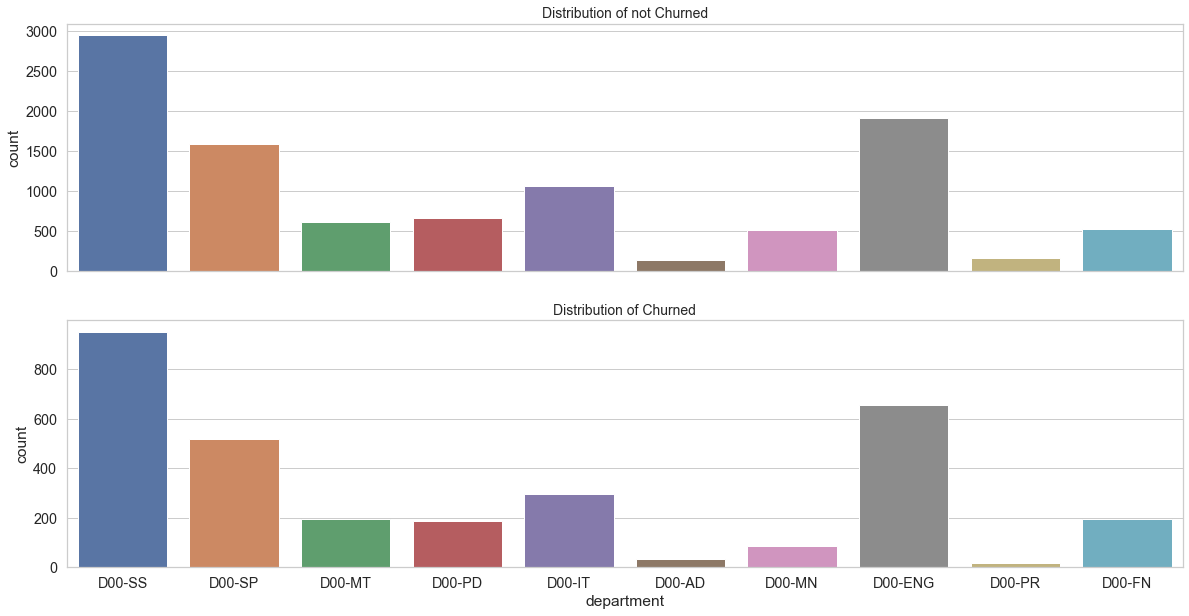

In [96]:
# Using pandas plot function to plot the stacked bar chart for the Total females , Stayed and left by department.
# Slicing data with non-survial
emps_retained = df_employee_final['department'][df_employee_final['status'] == 0]

# Slicing data with survival
emps_left = df_employee_final['department'][df_employee_final['status'] == 1]




#females.groupby(['department'])['status'].value_counts().sort_values(ascending=False).plot.bar()
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 10))
sns.countplot(emps_retained,ax=ax1)
ax1.set_title(label = 'Distribution of not Churned', size = 14)
ax1.set_xlabel(xlabel = '')
sns.countplot(emps_left ,ax=ax2)
ax2.set_title(label = 'Distribution of Churned', size = 14)
plt.show()

**Observations**
- D00FN,D00PD,D00MT lost almost half of their employees
- 2nd highest churn of employees were in D00-IT, D00-MN,D00-SP
-

<AxesSubplot:>

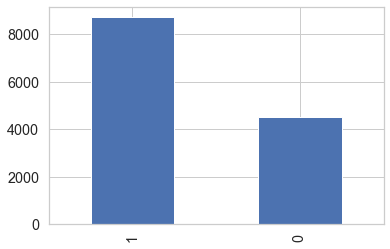

In [97]:
df_employee_final['gender'].value_counts().plot.bar()

**Observations**
- Females were 4532 almost little over half of their male employees count of 8728

In [98]:
females=df_employee_final[(df_employee_final['gender']==0)]
print(females.groupby('department').size().sort_values(ascending=False))

department
D00-SS     1361
D00-ENG     880
D00-SP      700
D00-IT      493
D00-PD      285
D00-MT      271
D00-FN      236
D00-MN      196
D00-AD       55
D00-PR       55
dtype: int64


**Observations**
- order of higher amount of females across organization in various department followed the tolal distribution employees order

In [99]:
males=df_employee_final[(df_employee_final['gender']==1)]


print(males.groupby('department').size().sort_values(ascending=False))

department
D00-SS     2534
D00-ENG    1693
D00-SP     1408
D00-IT      866
D00-PD      568
D00-MT      541
D00-FN      486
D00-MN      394
D00-AD      120
D00-PR      118
dtype: int64


**Observations**
-  order of higher amount of males across organization in various department followed the tolal distribution employees order

Text(0.5, 1.0, 'Bar Chart showing the Female employee status in each Department')

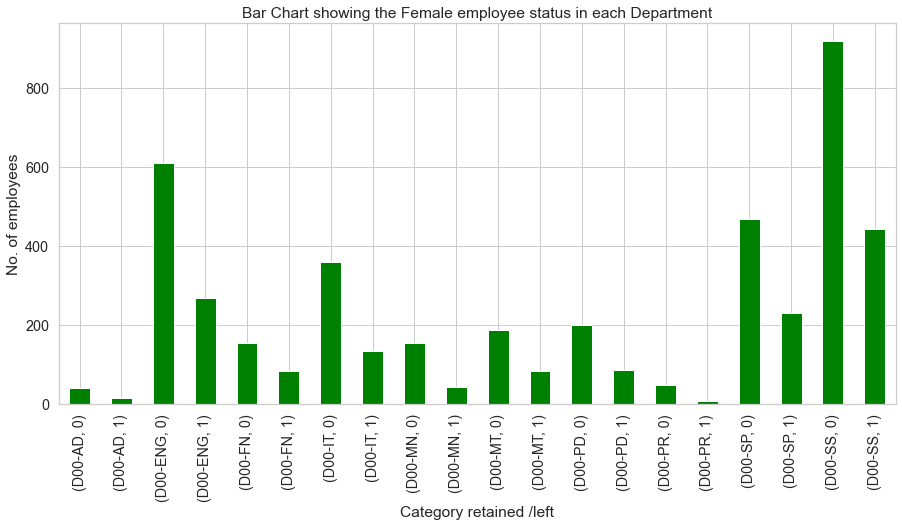

In [100]:
# Count of female employees retained and left by department
#males.groupby(['department'])['status'].value_counts().plot(kind='bar', figsize=(15, 7), color='orange')
females.groupby(['department'])['status'].value_counts().plot(kind='bar', figsize=(15, 7), color='green')
plt.xlabel('Category retained /left')
plt.ylabel('No. of employees')
plt.title('Bar Chart showing the Female employee status in each Department')
#plt.legend(labels=('Total_Fat', 'Saturated_Fat', 'Trans_Fat'))

Text(0.5, 1.0, 'Stacked Bar Chart showing the male employee status in each Department')

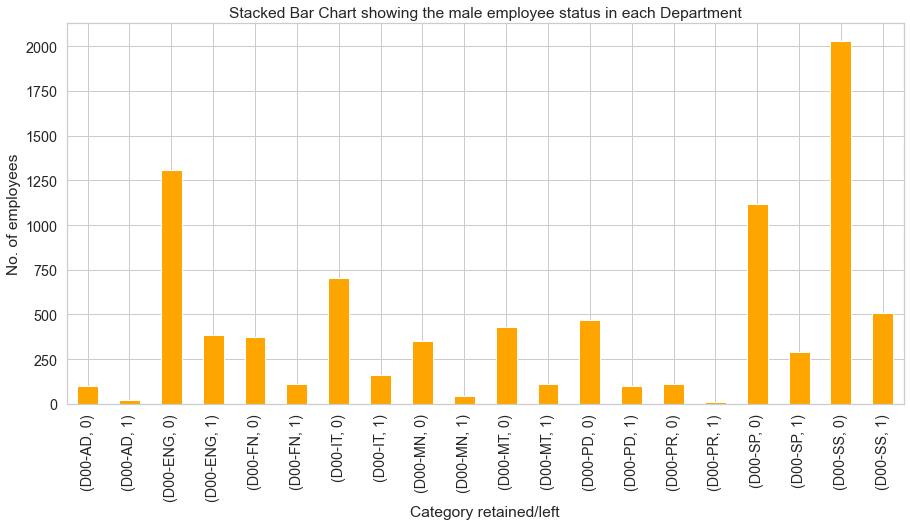

In [101]:
# count of male employees retained and left by department
males.groupby(['department'])['status'].value_counts().plot(kind='bar', figsize=(15, 7), color='orange')
plt.xlabel('Category retained/left')
plt.ylabel('No. of employees')
plt.title('Stacked Bar Chart showing the male employee status in each Department')

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\si

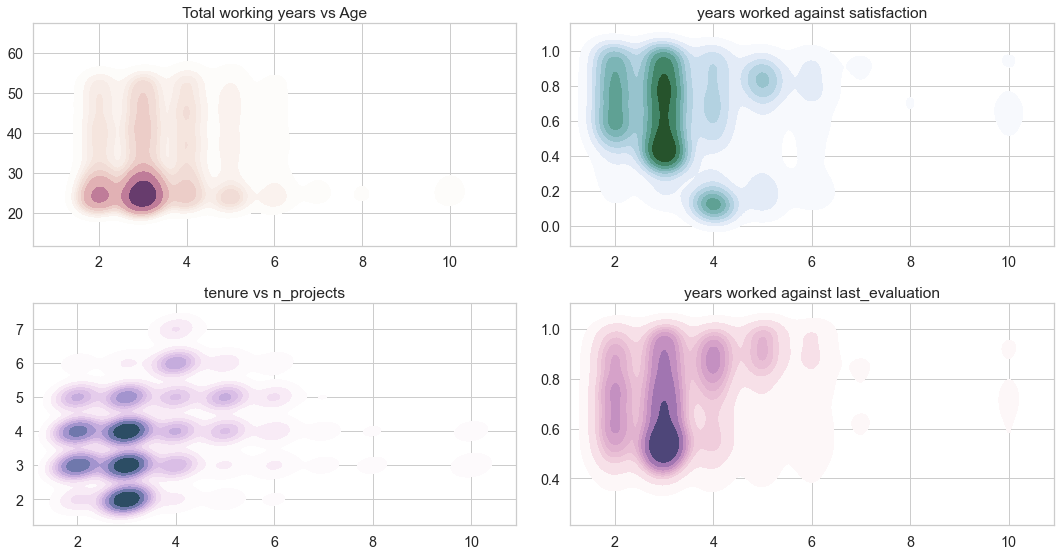

In [102]:
# Generate and plot age vs tenure
# Plotting the KDEplots
f, axes = plt.subplots(2, 2, figsize=(15, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

x = df_employee_final['tenure'].values
y = df_employee_final['age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = ' Total working years vs Age ')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df_employee_final['tenure'].values
y = df_employee_final['satisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[0,1])
axes[0,1].set( title = 'years worked against satisfaction')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df_employee_final['tenure'].values
y = df_employee_final['last_evaluation'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'years worked against last_evaluation')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df_employee_final['tenure'].values
y = df_employee_final['n_projects'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'tenure vs n_projects')

f.tight_layout()

**Observations**
- generally people are who are about 2-3 years and having 2-4 projects are a majority and they are satisfied and 4-5 years people are quite dissatisfied 

Text(0.5, 1.0, 'Regplot showing the variation of last_evaluation with avg working hours')

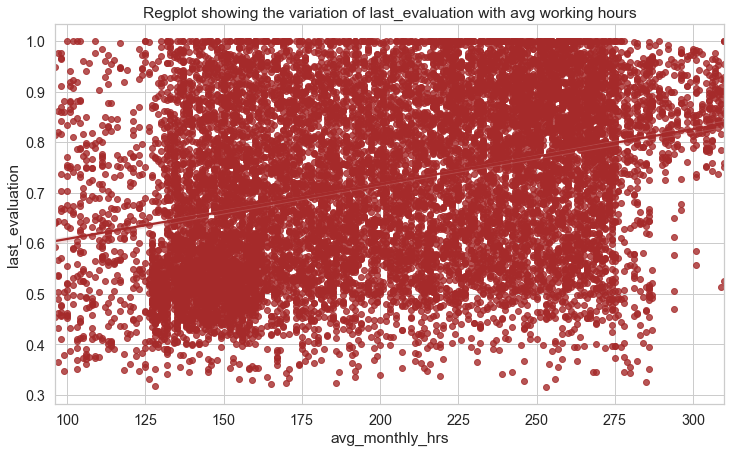

In [103]:
# Using seaborn's regplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.regplot(data=df_employee_final, x='avg_monthly_hrs', y='last_evaluation', color='brown')

plt.title('Regplot showing the variation of last_evaluation with avg working hours')

**Observations**
- we can see <275 avg hours almost all got high ratings in last_evaluation, quantity vs quality not available in data to comment

Text(0.5, 1.0, 'Regplot showing the variation of satisfaction with last_evaluation')

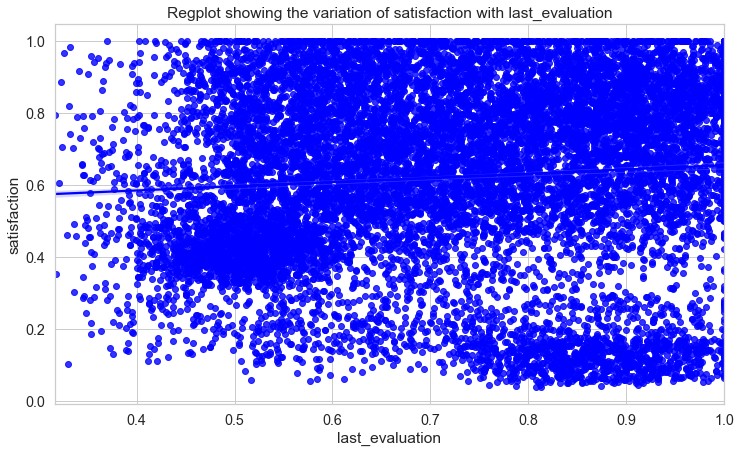

In [104]:
# Using seaborn's regplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.regplot(data=df_employee_final, x='last_evaluation', y='satisfaction', color='blue')

plt.title('Regplot showing the variation of satisfaction with last_evaluation')

**Observations**
- order of higher amount of females across organization in various department followed the tolal distribution employees order

Text(0.5, 1.0, 'Regplot showing the variation of avg_monthly_hrs with last_evaluation')

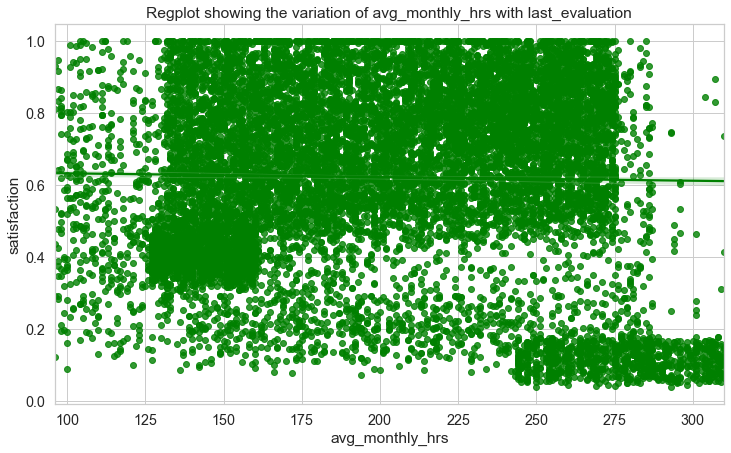

In [105]:
# Using seaborn's regplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.regplot(data=df_employee_final, x='avg_monthly_hrs', y='satisfaction', color='green')

plt.title('Regplot showing the variation of avg_monthly_hrs with last_evaluation')

**Observations**
- the people who spend more hours<275 , who get high rating are also highly dissatisfied due to missing work-life balance, obviously

Text(0.5, 1.0, 'Regplot showing the variation of n_projects with avg_monthly_hrs')

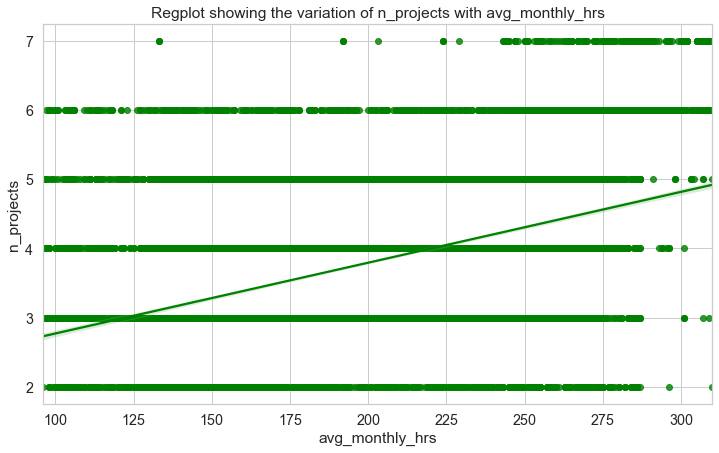

In [106]:
# Using seaborn's regplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.regplot(data=df_employee_final, x='avg_monthly_hrs', y='n_projects', color='green')

plt.title('Regplot showing the variation of n_projects with avg_monthly_hrs')

**Observations**
- 4 projects people max clocked 300 hrs avg
- No surprises on 5, 6 , 7 clocking 300 hrs avg
- why 3 projects and 2 projects sparsely clocked above 300 hours , anyways population in that category was too less 

Text(0.5, 1.0, 'Regplot showing the variation of n_projects with last_evaluation')

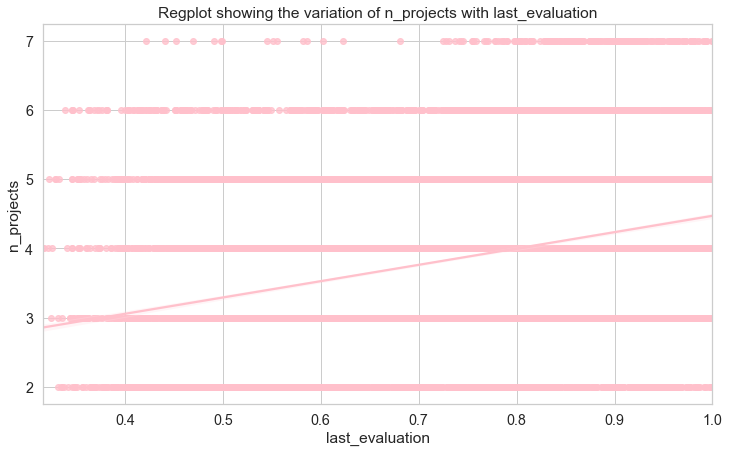

In [107]:
# Using seaborn's regplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.regplot(data=df_employee_final, x='last_evaluation', y='n_projects', color='pink')

plt.title('Regplot showing the variation of n_projects with last_evaluation')

**Observations**

- No surprises on 7 projects rating clocked higher and highest


Text(0.5, 1.0, 'Regplot showing the variation of avg_monthly_hrs with recently_promoted')

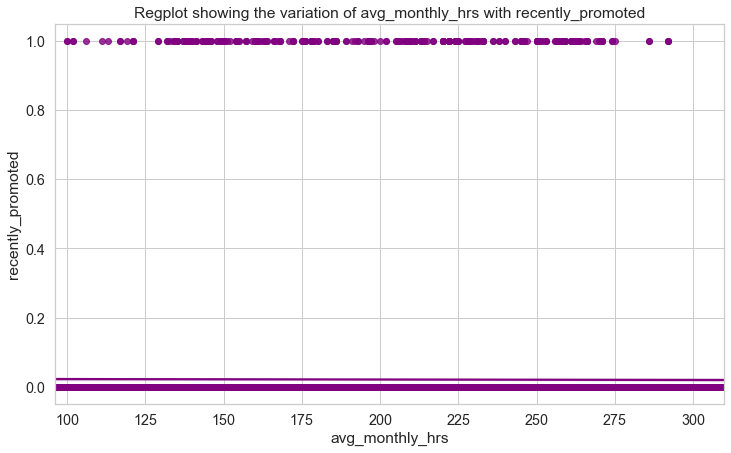

In [108]:
# Using seaborn's regplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.regplot(data=df_employee_final, x='avg_monthly_hrs', y='recently_promoted', color='purple')

plt.title('Regplot showing the variation of avg_monthly_hrs with recently_promoted')

**Observations**
- recently promoted were working less than 300 hrs but on avg >130 hrs

Text(0.5, 1.0, 'Regplot showing the variation of last_evaluation with recently_promoted')

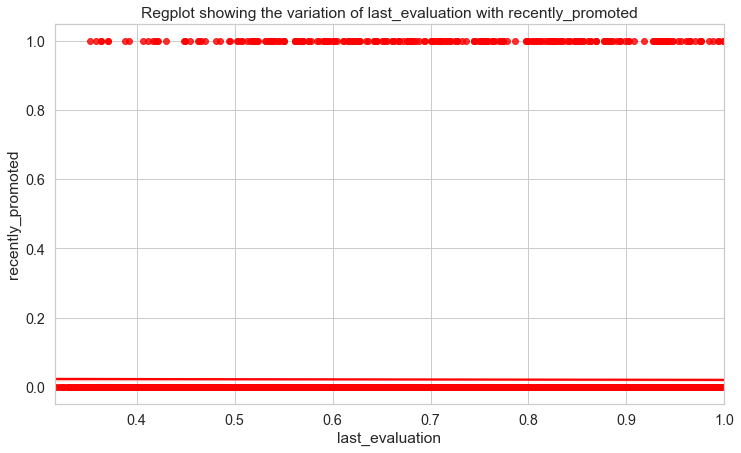

In [109]:
# Using seaborn's regplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.regplot(data=df_employee_final, x='last_evaluation', y='recently_promoted', color='red')

plt.title('Regplot showing the variation of last_evaluation with recently_promoted')

**Observations**
- promoted employees werehaing rating from 0.3 to all the way 1.0 expected to see only higher rating be promoted, their criterion for promotion is certainly by last_evaluation

Text(0.5, 1.0, 'scatterplot showing the variation of last_evaluation with department')

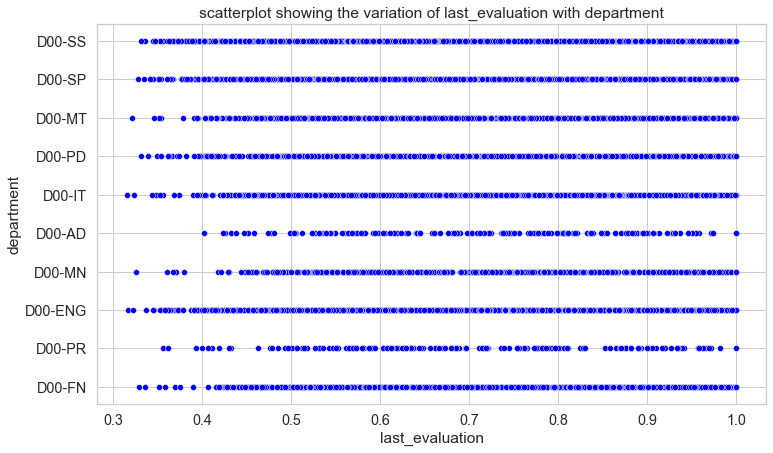

In [110]:
# Using seaborn's scatterplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.scatterplot(data=df_employee_final, x='last_evaluation', y='department', color='blue')

plt.title('scatterplot showing the variation of last_evaluation with department')

**Observations**
-  last_evaluation for department AD higher than any department , PR and MN are similar too , SSand SP are starting from 0.35 

Text(0.5, 1.0, 'scatterplot showing the variation of satisfaction with department')

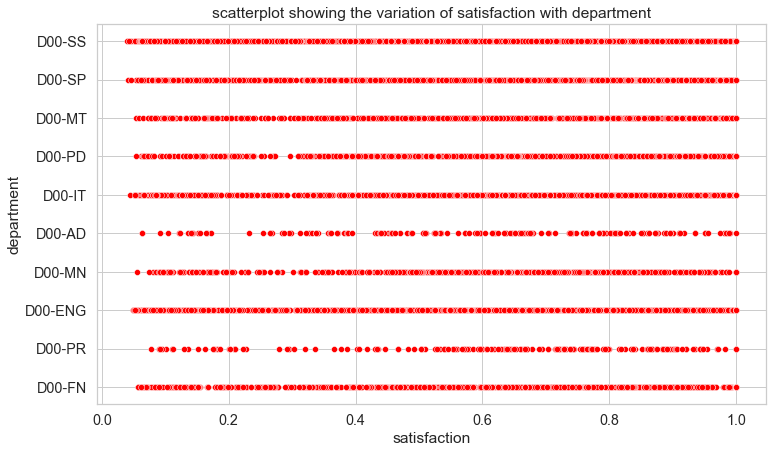

In [111]:
# Using seaborn's scatterplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.scatterplot(data=df_employee_final, x='satisfaction', y='department', color='red')

plt.title('scatterplot showing the variation of satisfaction with department')

**Observations**
-   PR has slightly high satisfied employees and MN &AD are slightly similar too

Text(0.5, 1.0, 'scatterplot showing the variation of avg_monthly_hrs with department')

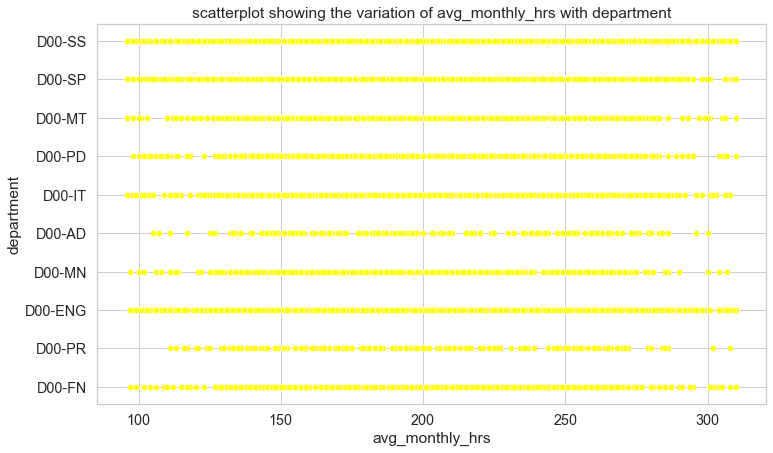

In [112]:
# Using seaborn's scatterplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.scatterplot(data=df_employee_final, x='avg_monthly_hrs', y='department', color='yellow')

plt.title('scatterplot showing the variation of avg_monthly_hrs with department')

**Observations**
-  ~130 avg working hrs for department PR higher than any department to start with, followed by AD and PD are similar too and they also work about ~275 hours showing that there is work/life balance and more engagement

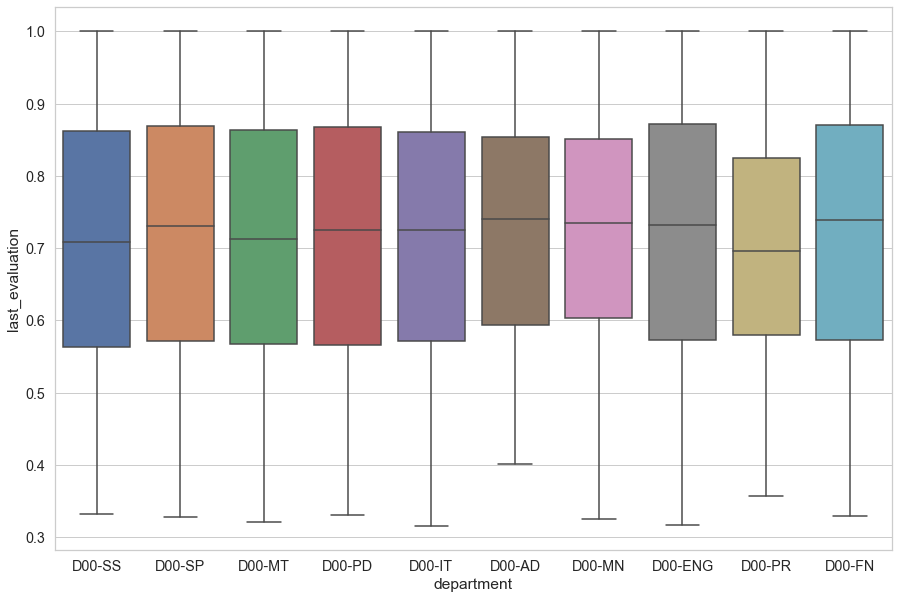

In [113]:
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(15,10)
sns.boxplot(x = 'department', y = 'last_evaluation', data =df_employee_final )

plt.show()

**Observations**
- last_eval brought interesting perspectives D00-MN department has very less variation in assessment than all departments however closer to D00-PR, however Doo-PR had their median values lower than them
- D00-FN had huge variation in assesment similar to that of D00-ENG and D00-FN
- D00-SP,PD were similar to each other

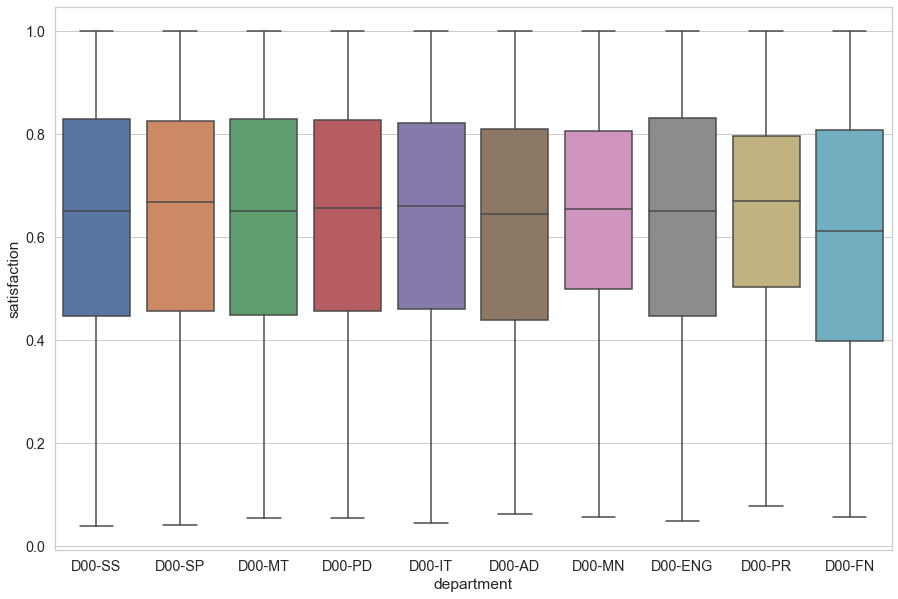

In [114]:
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(15,10)
sns.boxplot(x = 'department', y = 'satisfaction', data =df_employee_final )

plt.show()

**Observations**
- last_eval brought interesting perspectives D00-PR department has very less variation in assessment than all departments however closer to D00-MN
- D00-FN had huge variation in assesment similar to that of D00-ENG with D00-FN median slightly lower
- D00-SS,SP,PD were similar to each other

Text(0.5, 1.0, 'Regplot showing the variation of n_projects with age')

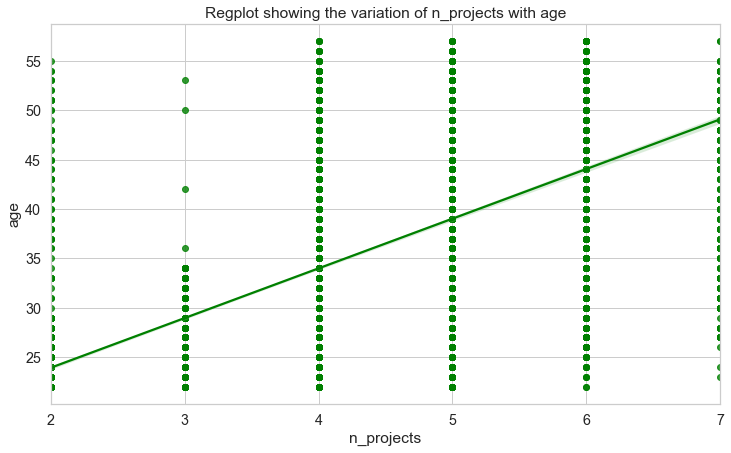

In [115]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_employee_final, x='n_projects', y='age', color='green')

plt.title('Regplot showing the variation of n_projects with age')

Text(0.5, 1.0, 'Regplot showing the variation of n_projects with marital_status')

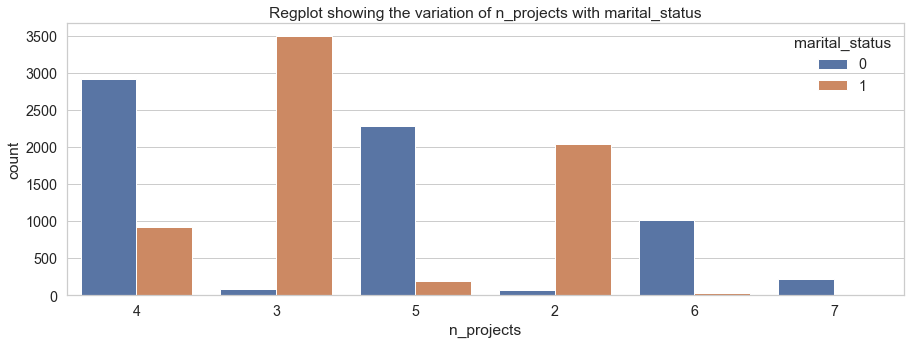

In [116]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='n_projects', hue="marital_status", order=df_employee_final.n_projects.value_counts().iloc[:15].index, data=df_employee_final, ax=axis1)




plt.title('Regplot showing the variation of n_projects with marital_status')

**Observations**
- unmarried are taking more of 2 or 3 projects 
- Married people seems to be taking good amount of load 4, 5, 6 and 7 projects  

In [117]:
#Feature Engineering
status_stayed=df_employee_final[(df_employee_final['status']==0)]
status_left=df_employee_final[(df_employee_final['status']==1)]

Text(0.5, 0, 'satisfaction')

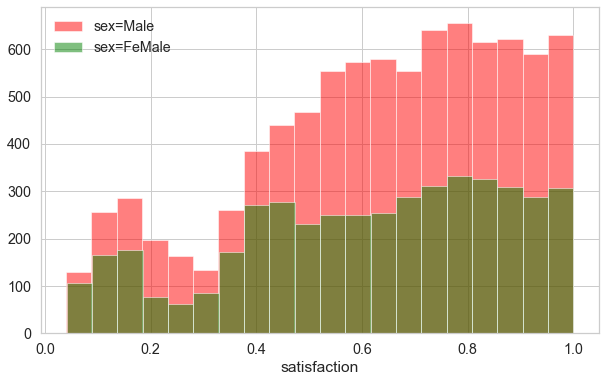

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_employee_final[df_employee_final['gender']==1]['satisfaction'].hist(alpha=0.5,color='red',
                                              bins=20,label='sex=Male')
df_employee_final[df_employee_final['gender']==0]['satisfaction'].hist(alpha=0.5,color='green',
                                              bins=20,label='sex=FeMale')
plt.legend()
plt.xlabel('satisfaction')

**Observations**
- Males are higher dissatisfied than females , but the number of males 2 times females , so It is more females who are bordering between dissatisfaction and satisfaction, to uderstand lets dig deeper

Text(0.5, 0, 'satisfaction')

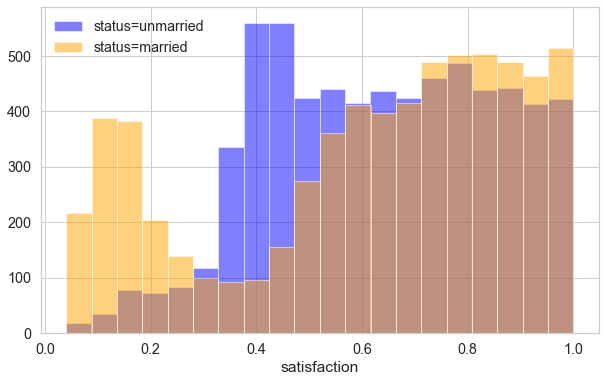

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_employee_final[df_employee_final['marital_status']==1]['satisfaction'].hist(alpha=0.5,color='blue',
                                              bins=20,label='status=unmarried')
df_employee_final[df_employee_final['marital_status']==0]['satisfaction'].hist(alpha=0.5,color='orange',
                                              bins=20,label='status=married')
plt.legend()
plt.xlabel('satisfaction')

**Observations**
- married are dissatisfied than unmarried males/females counter parts-could be company support to child care, pregnancy leave etc,
- unmarried are high around the border of disatisfaction to satisfaction , showing that they could leave 

Text(0.5, 0, 'status')

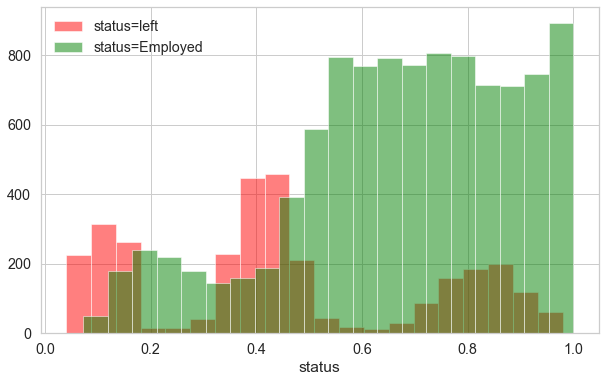

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_employee_final[df_employee_final['status']==1]['satisfaction'].hist(alpha=0.5,color='red',
                                              bins=20,label='status=left')
df_employee_final[df_employee_final['status']==0]['satisfaction'].hist(alpha=0.5,color='green',
                                              bins=20,label='status=Employed')
plt.legend()
plt.xlabel('status')

**Observations**
- highly dissatisfied and employees in border of dissatisfaction beneath 0.6 have left the company than the counter parts in highly satisfied 0.6-1.0,
- so we should concentrate on dissatisfied /borderline employees for retention

Text(0.5, 0, 'last_evaluation')

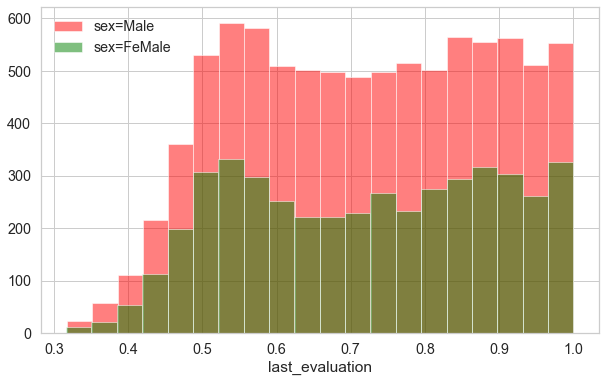

In [121]:
plt.figure(figsize=(10,6))
df_employee_final[df_employee_final['gender']==1]['last_evaluation'].hist(alpha=0.5,color='red',
                                              bins=20,label='sex=Male')
df_employee_final[df_employee_final['gender']==0]['last_evaluation'].hist(alpha=0.5,color='green',
                                              bins=20,label='sex=FeMale')
plt.legend()
plt.xlabel('last_evaluation')

**Observations**
- Males and females have similar evaluations distributions showing that there is no gender bias happening and it is not the cause of leaving

Text(0.5, 0, 'satisfaction')

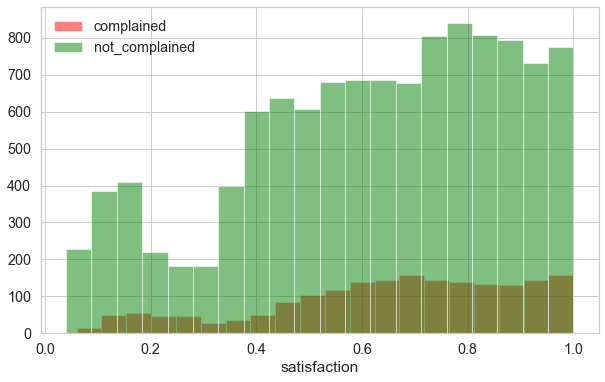

In [122]:
plt.figure(figsize=(10,6))
df_employee_final[df_employee_final['filed_complaint']==1]['satisfaction'].hist(alpha=0.5,color='red',
                                              bins=20,label='complained')
df_employee_final[df_employee_final['filed_complaint']==0]['satisfaction'].hist(alpha=0.5,color='green',
                                              bins=20,label='not_complained')
plt.legend()
plt.xlabel('satisfaction')

**Observation**
- complaints increased with highly satisfied people
- may be we need to allow the team to make complaints and reseolve or feedback and action should be improved

Text(0.5, 1.0, 'Correlation between features')

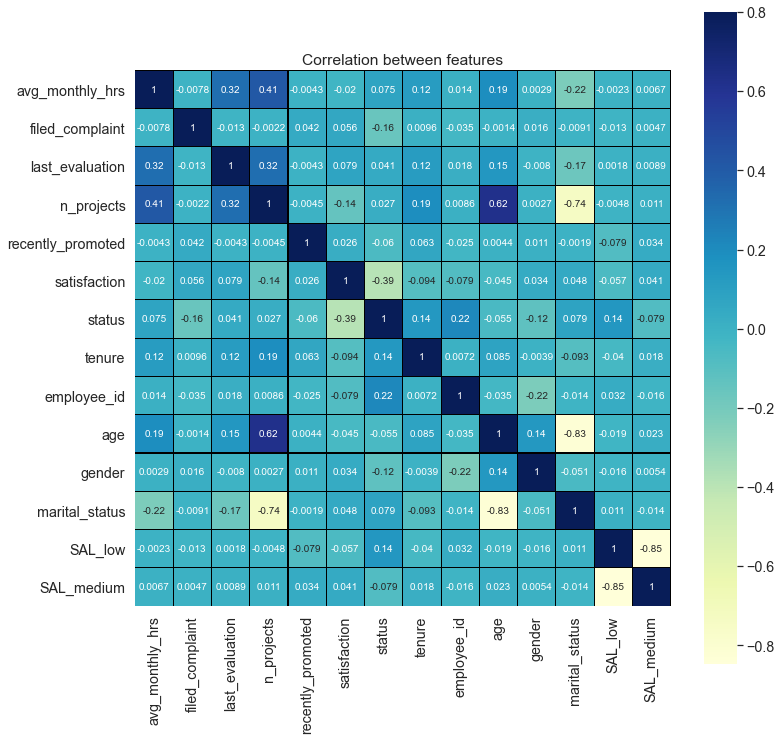

In [123]:
# creating a list of only numerical values
#df_employee_final.drop('employee_id')
corr = df_employee_final.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Text(0.5, 1.0, 'Correlation between features')

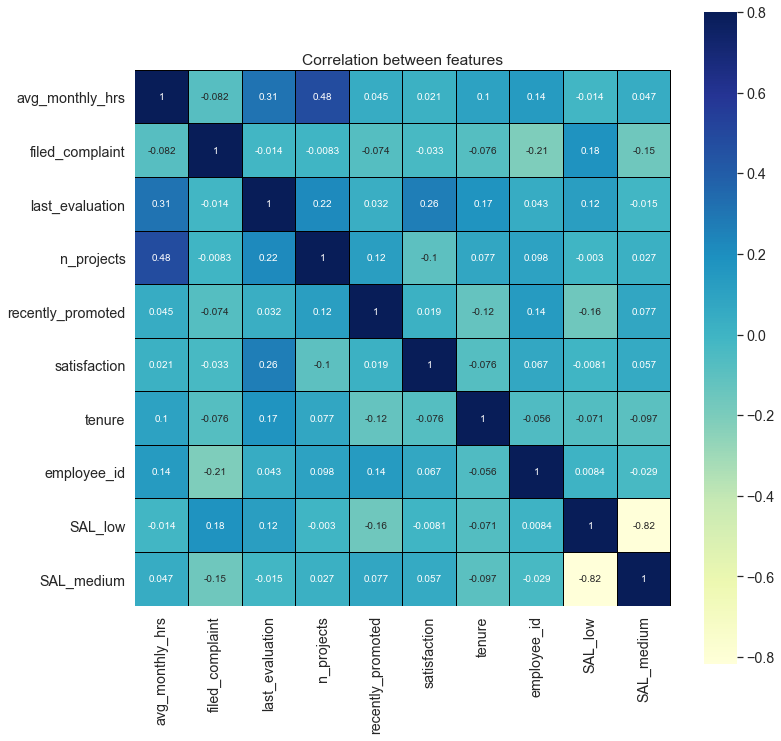

In [124]:
# creating a list of only numerical values
#df_employee_final.drop('employee_id')
corr1 = Insaid_unseen.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr1,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

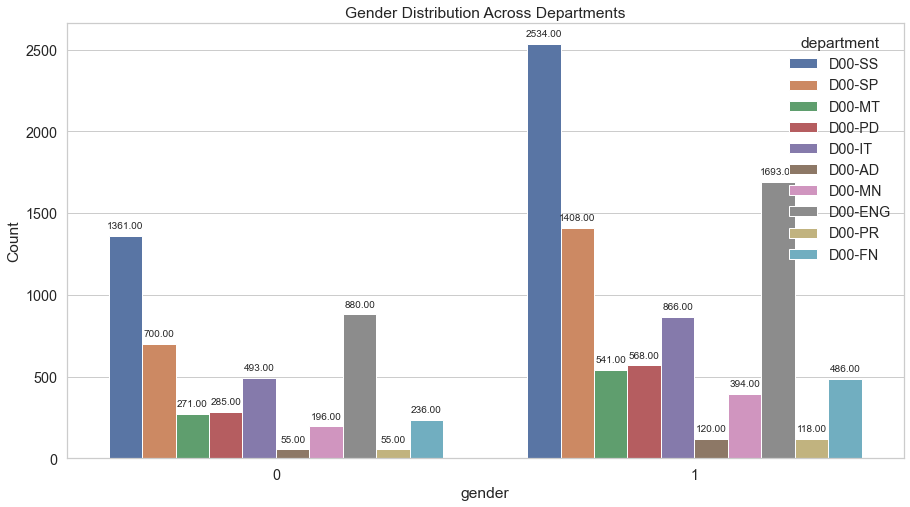

In [125]:
total = len(df_employee_final['gender'])*1.
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
splot = sns.countplot(x='gender', hue="department", data=df_employee_final, ax=axis1)
plt.title("Gender Distribution Across Departments")
plt.ylabel('Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


Text(0.5, 1.0, 'Age distribution Across departments')

<Figure size 1080x360 with 0 Axes>

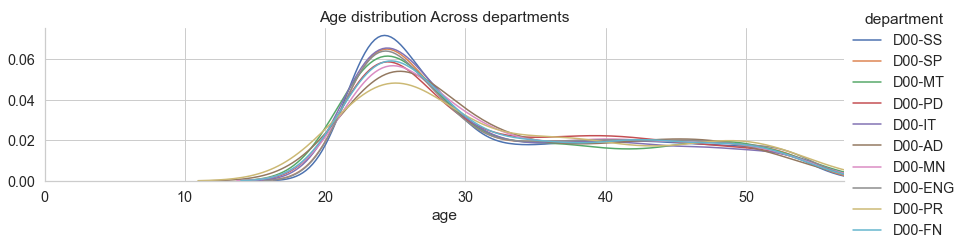

In [126]:
#Age distribution across the departments
plt.figure(figsize=(15,5))
facet = sns.FacetGrid(df_employee_final, hue="department",aspect=4)
facet.map(sns.kdeplot,'age') 
facet.set(xlim=(0, df_employee_final['age'].max()))
facet.add_legend()
plt.title("Age distribution Across departments")

Text(0.5, 1.0, 'Age Vs Gender Distribution')

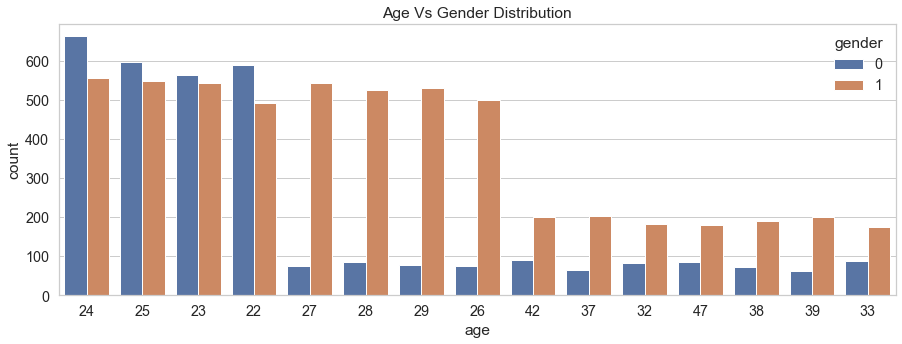

In [127]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='age', hue="gender", order=df_employee_final.age.value_counts().iloc[:15].index, data=df_employee_final, ax=axis1)
plt.title("Age Vs Gender Distribution")

Text(0.5, 1.0, 'Age Vs recent_promotions Distribution')

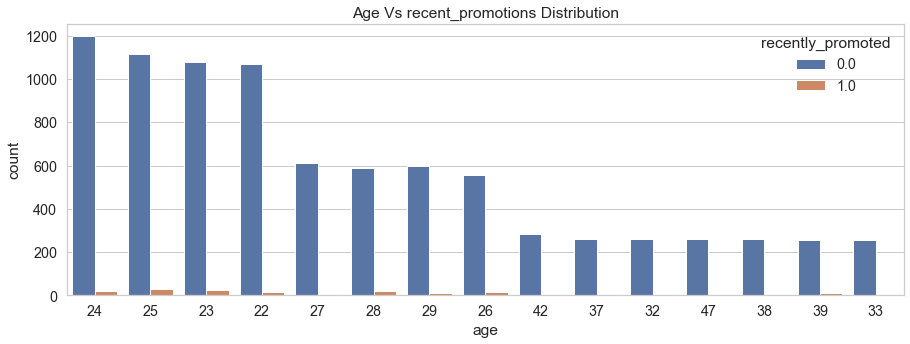

In [128]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='age', hue="recently_promoted", order=df_employee_final.age.value_counts().iloc[:15].index, data=df_employee_final, ax=axis1)
plt.title("Age Vs recent_promotions Distribution")

Text(0.5, 1.0, 'Age Vs retention Distribution')

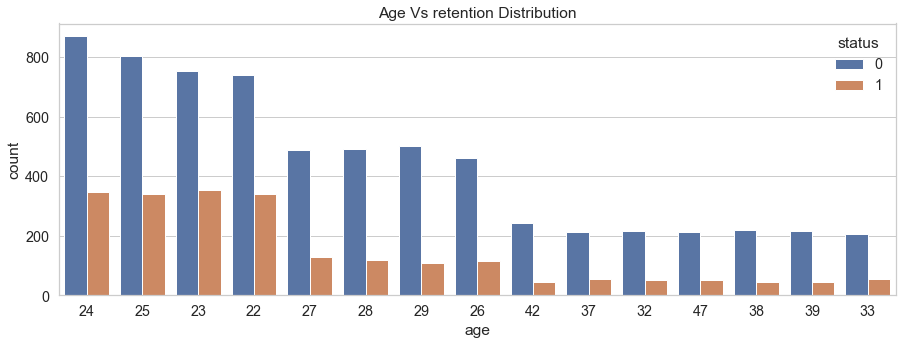

In [129]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='age', hue="status", order=df_employee_final.age.value_counts().iloc[:15].index, data=df_employee_final, ax=axis1)
plt.title("Age Vs retention Distribution")

**Observations**
- lots of young people leave
- some late thirties to early forties people also left , must be managers who leave


Text(0.5, 1.0, 'gender Vs retention Distribution')

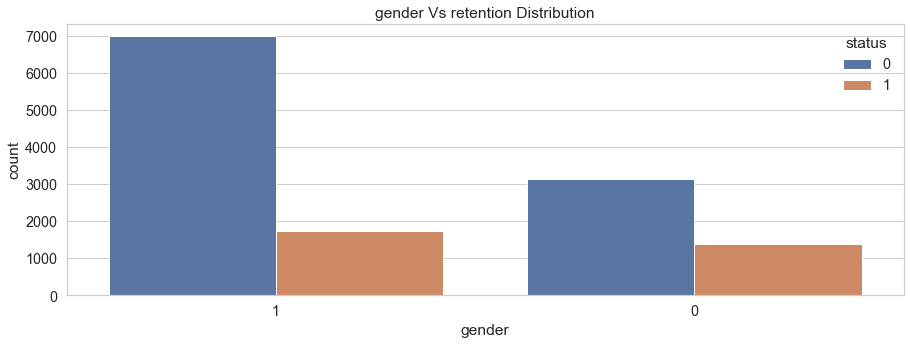

In [130]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='gender', hue="status", order=df_employee_final.gender.value_counts().iloc[:15].index, data=df_employee_final, ax=axis1)
plt.title("gender Vs retention Distribution")

**Observations**
- lots of young females leave almost half compared to almost quarter of males may be young mothers needed support like day care etc



In [131]:
df_employee_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,age,gender,marital_status,SAL_low,SAL_medium,dept_id,dept_name,dept_head
0,156.0,D00-SS,1.0,0.474082,2,0.0,0.405101,1,3.0,126150,24,0,1,0,1,D00-SS,Sales,Edward J Bayley
1,146.0,D00-SS,0.0,0.507349,2,0.0,0.434845,1,3.0,113707,23,0,1,0,1,D00-SS,Sales,Edward J Bayley
2,281.0,D00-SS,0.0,0.907965,6,0.0,0.105749,1,4.0,122394,50,0,0,0,1,D00-SS,Sales,Edward J Bayley
3,269.0,D00-SS,0.0,0.959077,4,0.0,0.960757,1,5.0,126860,25,0,1,0,1,D00-SS,Sales,Edward J Bayley
4,256.0,D00-SS,0.0,0.897617,5,0.0,0.753731,1,5.0,110655,24,0,1,0,1,D00-SS,Sales,Edward J Bayley


In [132]:
#pip install -U yellowbrick

In [133]:
# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances

from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

In [134]:
df_employee_final.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'satisfaction', 'status', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'SAL_low',
       'SAL_medium', 'dept_id', 'dept_name', 'dept_head'],
      dtype='object')

In [135]:
features=['avg_monthly_hrs','filed_complaint','last_evaluation',
       'n_projects', 'recently_promoted', 'satisfaction','tenure',
       'age', 'gender', 'marital_status', 'SAL_low','SAL_medium']

In [136]:
#feature importance
X = df_employee_final[features]
y = df_employee_final['status']

In [137]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 5
Threshold set by Model: 0.08
Features: ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure']


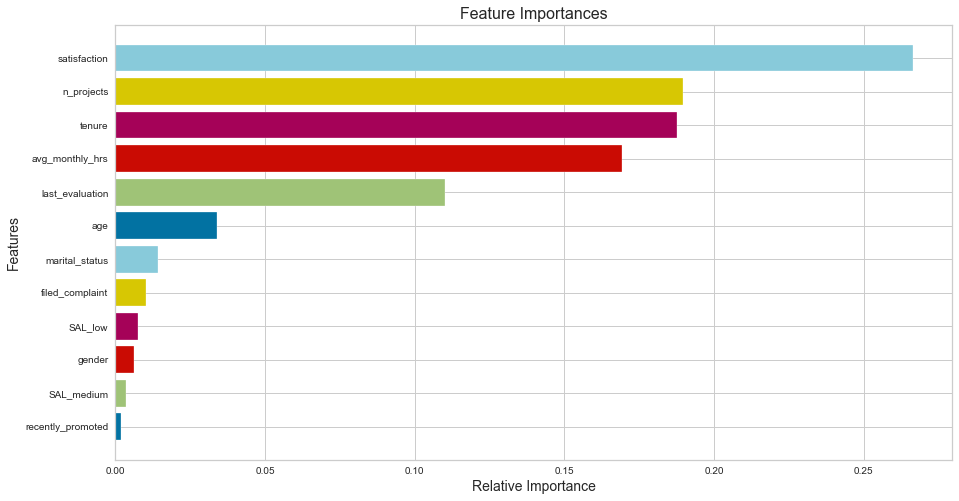

In [138]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [139]:
Features_select = ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure']

In [140]:
df_attrition_final = df_employee_final[Features_select]


In [141]:
X_Insaid_unseen=Insaid_unseen[Features_select]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df_attrition_final, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (10608, 5) (10608,)
Testing Data Shape: (2652, 5) (2652,)


In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [144]:
# Summarize original class distribution
print(Counter(y))

Counter({0: 10130, 1: 3130})


In [145]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

# Logistic Regression

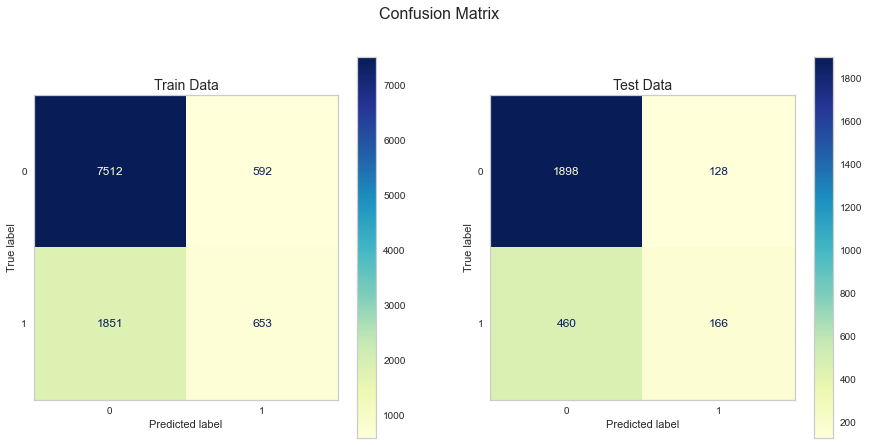

In [146]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)
y_Insaid_unseen_count =log.predict(X_Insaid_unseen)

y_train_pred_proba = log.predict_proba(X_train)
y_test_pred_proba = log.predict_proba(X_test)
y_Insaid_unseen_pred_proba =log.predict_proba(X_Insaid_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = log, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = log, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)

ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)


plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **7512 instances correctly** for **negative class** while **653 instances** were predicted **correctly** for **positive class**.
  - Model **identified 1851 instances negative but in actual** they **were positive**.
  - Model **identified 592 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **1898 instances correctly** for **negative class** while **166 instances** were predicted **correctly** for **positive class**.
  - Model **identified 460 instance negative but in actual** it **was positive**.
  - Model **identified 128 instances positive but in actual** they **were negative**.

In [147]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)

print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      8104
           1       0.52      0.26      0.35      2504

    accuracy                           0.77     10608
   macro avg       0.66      0.59      0.60     10608
weighted avg       0.74      0.77      0.74     10608

                    Testing Report           
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2026
           1       0.56      0.27      0.36       626

    accuracy                           0.78      2652
   macro avg       0.68      0.60      0.61      2652
weighted avg       0.75      0.78      0.75      2652



**Observation:**

- **Accuracy** for **training data is close** as **compared to testing data**.
- **Similar is the case with Precision and recall** for training data and testing data.

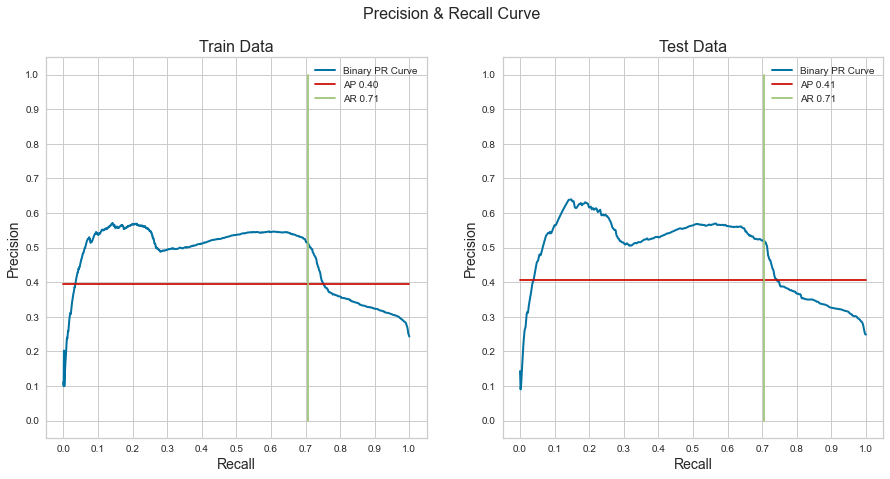

In [148]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 71%** while **for testing data it is 71%**.
- The **average recall** for **training data is 41%** while **for testing data it is 41%**.

# SVC

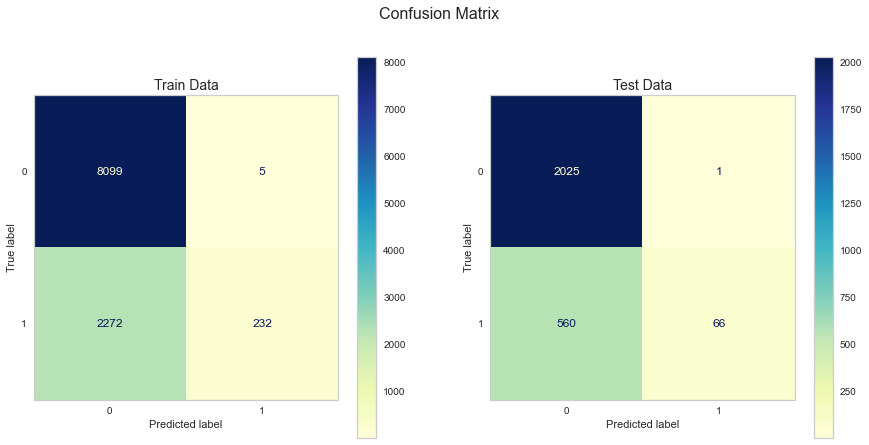

In [149]:
svc_clf = SVC(random_state = 42, probability = True)
svc_clf.fit(X_train, y_train)

y_train_pred_count = svc_clf.predict(X_train)
y_test_pred_count = svc_clf.predict(X_test)
y_Insaid_unseen_svc_count =svc_clf.predict(X_Insaid_unseen)

y_train_pred_proba = svc_clf.predict_proba(X_train)
y_test_pred_proba = svc_clf.predict_proba(X_test)
y_Insaid_unseen_svc_proba =svc_clf.predict_proba(X_Insaid_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = svc_clf, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = svc_clf, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **8099 instances correctly** for **negative class** while **232 instances** were predicted **correctly** for **positive class**.
  - Model **identified 2272 instances negative but in actual** they **were positive**.
  - Model **identified 5 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **2025 instances correctly** for **negative class** while **66 instances** were predicted **correctly** for **positive class**.
  - Model **identified 560 instance negative but in actual** they **were positive**.
  - Model **identified 1 instances positive but in actual** they **were negative**.

In [150]:
svc_report_train = classification_report(y_train, y_train_pred_count)
svc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(svc_report_train)
print('                    Testing Report           ')
print(svc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8104
           1       0.98      0.09      0.17      2504

    accuracy                           0.79     10608
   macro avg       0.88      0.55      0.52     10608
weighted avg       0.83      0.79      0.71     10608

                    Testing Report           
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2026
           1       0.99      0.11      0.19       626

    accuracy                           0.79      2652
   macro avg       0.88      0.55      0.53      2652
weighted avg       0.83      0.79      0.72      2652



**Observation:**

- **Accuracy** for **training data is same** as **compared to testing data** which is **better than logistic regression**.
- **Similar is the case with Precision and recall** for training data and testing data.

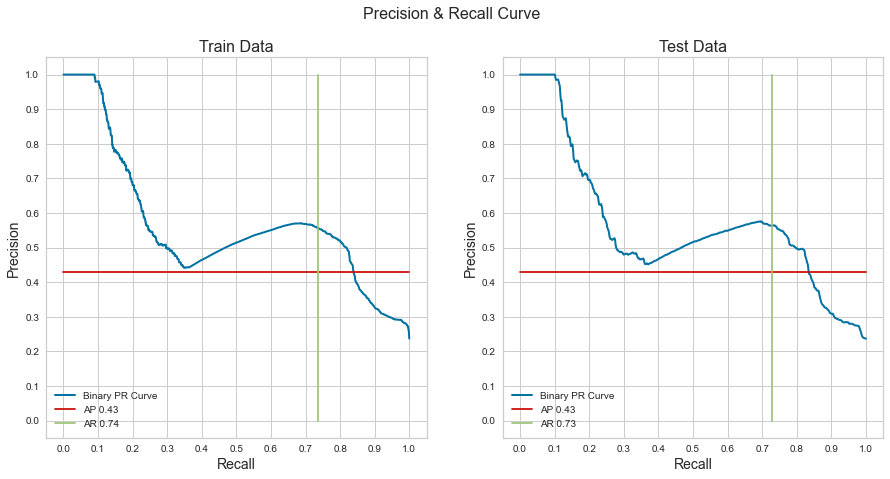

In [151]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 74%** while **for testing data it is 73%**.
- The **average recall** for **training and testing data is 43%** .

# **Decision Tree Classifier**

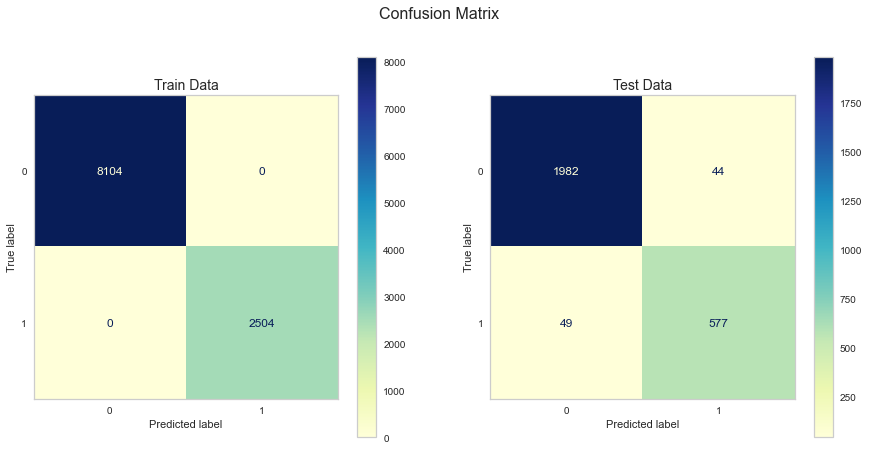

In [152]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, y_train)

y_train_pred_count = dtc.predict(X_train)
y_test_pred_count = dtc.predict(X_test)
y_Insaid_unseen_dtc_count =dtc.predict(X_Insaid_unseen)

y_train_pred_proba = dtc.predict_proba(X_train)
y_test_pred_proba = dtc.predict_proba(X_test)
y_Insaid_unseen_dtc_proba =dtc.predict_proba(X_Insaid_unseen)[:,1]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = dtc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = dtc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **8104 instances correctly** for **negative class** while **2504 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **1982 instances correctly** for **negative class** while **577 instances** were predicted **correctly** for **positive class**.
  - Model **identified 49 instance negative but in actual** they **were positive**.
  - Model **identified 44 instances positive but in actual** they **were negative**.

In [153]:
dtc_report_train = classification_report(y_train, y_train_pred_count)
dtc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(dtc_report_train)
print('                    Testing Report           ')
print(dtc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8104
           1       1.00      1.00      1.00      2504

    accuracy                           1.00     10608
   macro avg       1.00      1.00      1.00     10608
weighted avg       1.00      1.00      1.00     10608

                    Testing Report           
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2026
           1       0.93      0.92      0.93       626

    accuracy                           0.96      2652
   macro avg       0.95      0.95      0.95      2652
weighted avg       0.96      0.96      0.96      2652



**Observation:**

- **Accuracy** for **training data is high** as **compared to testing data hence overfitting** over train data.
- **Similar is the case with Precision and recall** for training data and testing data.

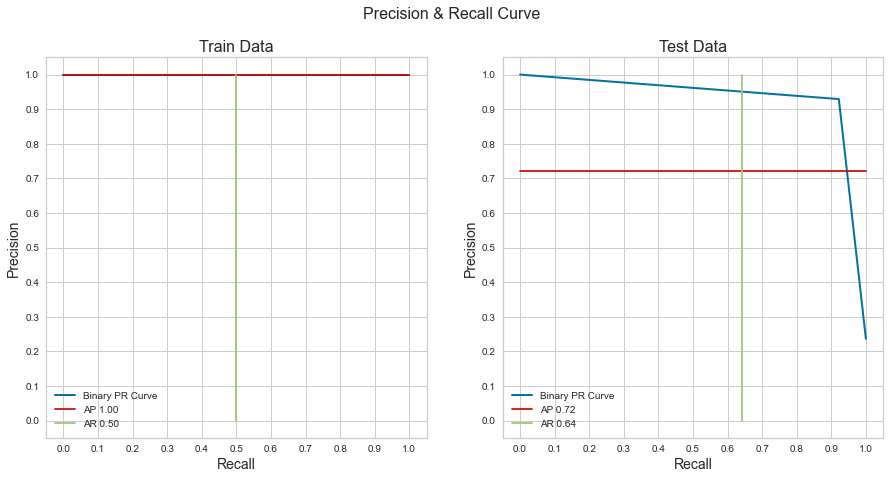

In [154]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Note:** In Training Data graph, the blue line is under the red line.

**Observation:**

- We can see that **average precision** for **training data is 100%** while **for testing data it is 72%**.
- The **average recall** for **training data is 50%** while **for testing data it is 64%**.

# **8.1.4 Random Forest Classifier**

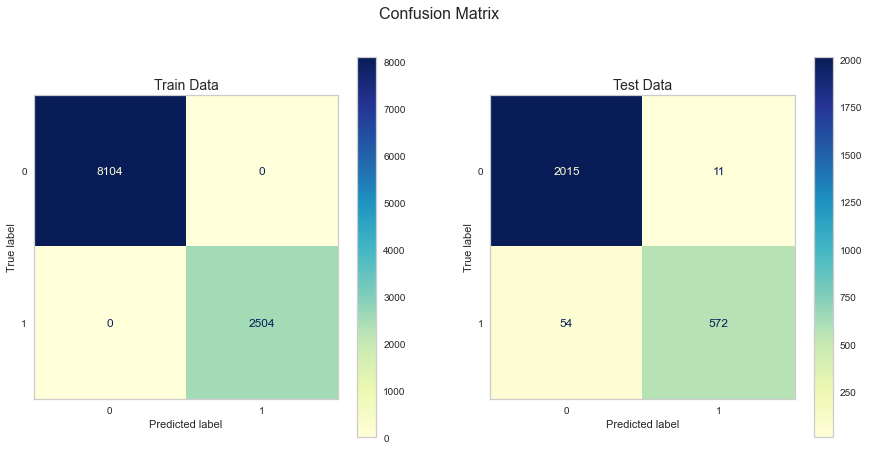

In [155]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)
y_Insaid_unseen_rfc_count =rfc.predict(X_Insaid_unseen)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)
y_Insaid_unseen_rfc_proba = rfc.predict_proba(X_Insaid_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **8104 instances correctly** for **negative class** while **2504 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **2015 instances correctly** for **negative class** while **572 instances** were predicted **correctly** for **positive class**.
  - Model **identified 54 instance negative but in actual** they **were positive**.
  - Model **identified 11 instances positive but in actual** they **were negative**.

In [156]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8104
           1       1.00      1.00      1.00      2504

    accuracy                           1.00     10608
   macro avg       1.00      1.00      1.00     10608
weighted avg       1.00      1.00      1.00     10608

                    Testing Report           
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2026
           1       0.98      0.91      0.95       626

    accuracy                           0.98      2652
   macro avg       0.98      0.95      0.97      2652
weighted avg       0.98      0.98      0.98      2652



**Observation:**

- **Accuracy** for **training data is high** as **compared to testing data hence, overfitting** over train data.
- But our **accuracy on test has increased over rest models**.
- **Similar is the case with Precision and recall** for training data and testing data.
- It shows that **Random Forest worked better than other models**, which we **will tune in upcomming section**.

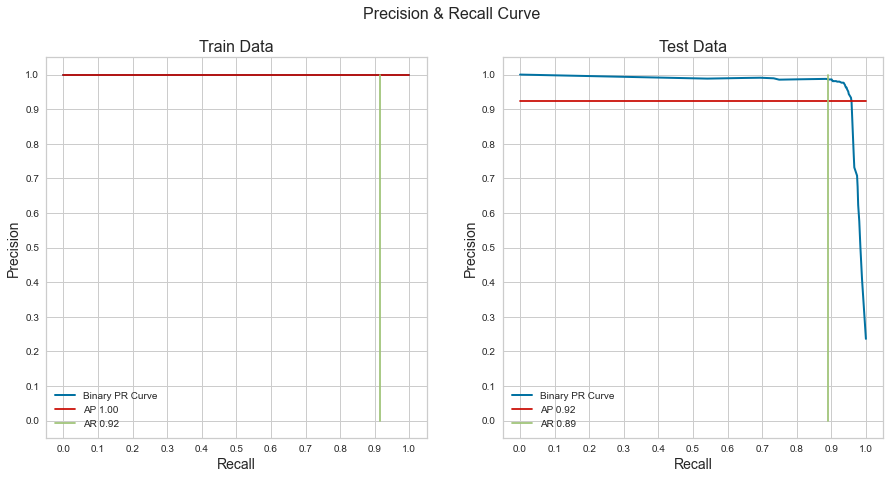

In [157]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 100%** while **for testing data it is 92%**.
- The **average recall** for **training data is 92%** while **for testing data it is 89%**.
- high recall + high precision : the class is perfectly handled by the model

# **Fine Tuning of Model**

- In previous section we saw **Random Forest working better than rest of the models**. So we **will** **focus** on **fine tuning of Random Forest** in this section.
- **Tuning** the model **takes** **extensive work**, so we will be **working** out **with few parameters instead** of **large combinations**.
- Now that we know that **Random Forest performed better** **than any other model**, we **will fine tune** it.
- For that we will **implement Grid Search CV** to **find optimal setting** for the model.
- **Note:** **We want to generalize results** i.e. same precision and recall on test data as that of train data.

In [158]:
param_grid = {
    'bootstrap': [True,False],
    'criterion':['entropy'],
    'max_depth': [10, 20, 15, 25],
    'max_features':['auto'],
    'min_samples_leaf': [2,3,4],
    'n_estimators': [400,500,600,700]
}

In [159]:
#Hyperparameter tuning
rand_forest = RandomForestClassifier(random_state = 42, n_jobs = -1)
random_search = GridSearchCV(estimator = rand_forest, param_grid = param_grid, scoring = 'f1', n_jobs = -1, cv = 10, return_train_score = True)
random_search.fit(X_train, y_train)
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_leaf=2, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [160]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 500}

- For complete summary of the results you can execute the following code:
  - pd.DataFrame(random_search.cv_results_)

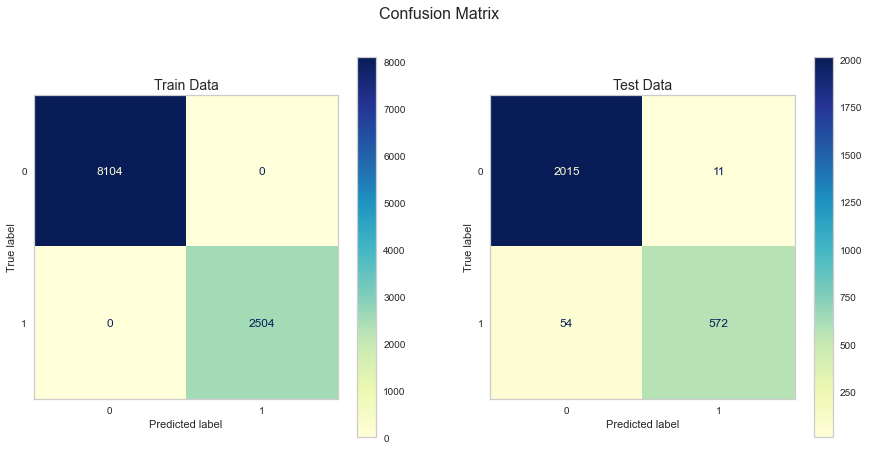

In [161]:
rfc1 = random_search.best_estimator_
rfc1.fit(X_train, y_train)

y_train_pred_count1 = rfc1.predict(X_train)
y_test_pred_count1 = rfc1.predict(X_test)
y_Insaid_unseen_rfc_count1 =rfc1.predict(X_Insaid_unseen)

y_train_pred_proba1 = rfc1.predict_proba(X_train)
y_test_pred_proba1 = rfc1.predict_proba(X_test)
y_Insaid_unseen_rfc_count1 =rfc1.predict_proba(X_Insaid_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **8104 instances correctly** for **negative class** while **2504 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **2015 instances correctly** for **negative class** while **582 instances** were predicted **correctly** for **positive class**.
  - Model **identified 44 instance negative but in actual** they **were positive**.
  - Model **identified 11 instances positive but in actual** they **were negative**.

In [162]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8104
           1       1.00      1.00      1.00      2504

    accuracy                           1.00     10608
   macro avg       1.00      1.00      1.00     10608
weighted avg       1.00      1.00      1.00     10608

                    Testing Report           
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2026
           1       0.98      0.91      0.95       626

    accuracy                           0.98      2652
   macro avg       0.98      0.95      0.97      2652
weighted avg       0.98      0.98      0.98      2652



**Observation:**

- We can see that from that the **Random Forest without optimization was overfitting** over the **training data** at 100%.
- But **now** the **generalization error** is very **close to the training error**.

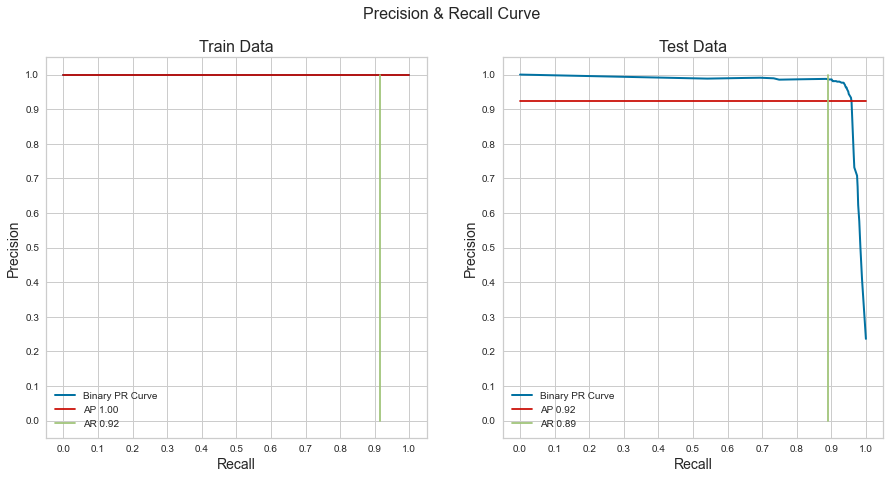

In [163]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 100%** while **for testing data it is 92%**.
- The **average recall** for **training data is 92%** while **for testing data it is 89%**.
- high recall + high precision : the class is perfectly handled by the model

**Note:**

- We have **choosen** only **limited number of combinations**.
- Generally, in **real life a script** is **prepared** for **heavy tuning** of the model.
- This **tuning takes several hours** under **high end performance systems**.

In [164]:
#RFC

In [165]:
print(rfc.predict_proba(X_Insaid_unseen)[:,1])


array([0.99, 0.  , 1.  , 0.  , 0.43, 0.  , 0.  , 0.04, 0.  , 0.  , 0.11,
       1.  , 0.99, 0.  , 0.01, 0.  , 1.  , 0.  , 0.  , 0.01, 1.  , 1.  ,
       0.  , 0.05, 0.93, 0.01, 0.  , 0.  , 0.99, 0.01, 0.01, 0.  , 0.03,
       0.01, 0.  , 0.38, 0.03, 1.  , 0.02, 0.  , 1.  , 0.7 , 0.  , 0.08,
       0.  , 0.01, 1.  , 0.  , 0.  , 0.07, 0.02, 0.02, 0.03, 0.01, 0.02,
       0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 1.  , 0.97, 0.  , 1.  , 0.84,
       0.  , 1.  , 0.  , 1.  , 0.05, 0.01, 0.  , 0.31, 0.83, 0.66, 0.03,
       0.  , 0.03, 0.05, 0.82, 0.89, 0.11, 0.99, 0.  , 0.  , 0.  , 0.13,
       0.  , 0.02, 0.9 , 1.  , 0.01, 0.97, 0.91, 0.  , 0.  , 0.  , 0.  ,
       0.06])

In [ ]:
y_pred_test_rfc[y_pred_test_rfc>0.7].sum()

In [166]:
print(rfc1.predict_proba(X_Insaid_unseen)[:,1])


[9.96901138e-01 6.66666667e-03 9.99711051e-01 1.00000000e-03
 3.65196248e-01 3.34933333e-03 5.20000000e-03 2.17618034e-02
 7.96546669e-05 1.33333333e-03 5.73333333e-02 9.99233333e-01
 9.98828171e-01 5.81350297e-05 2.71250728e-02 0.00000000e+00
 9.99779452e-01 1.33333333e-03 1.92307692e-04 8.33333333e-03
 9.94904217e-01 9.99907032e-01 0.00000000e+00 5.25000000e-02
 9.70485549e-01 1.47948890e-05 2.00000000e-03 6.16557636e-03
 9.99902439e-01 8.66666667e-03 6.05731034e-03 7.66666667e-03
 2.16693122e-02 6.33333333e-03 4.58179060e-05 3.90278043e-01
 1.58000000e-02 1.00000000e+00 3.81879433e-02 5.00000000e-03
 1.00000000e+00 7.92800000e-01 9.74605909e-03 7.43370319e-02
 1.47948890e-05 2.00800000e-02 9.99901138e-01 5.11852150e-03
 1.52059814e-04 5.52176542e-02 0.00000000e+00 1.37008790e-02
 6.66666667e-04 0.00000000e+00 5.20444444e-02 3.69014550e-03
 2.12400930e-03 0.00000000e+00 1.30681918e-02 9.96695002e-01
 0.00000000e+00 9.99848506e-01 9.83882174e-01 5.41113012e-05
 9.92000000e-01 8.188309

In [178]:
y_rfc1_submission=rfc1.predict_proba(X_Insaid_unseen)[:,1]

In [175]:
y_rfc1_pred_insaid_unseen_low = (rfc1.predict_proba(X_Insaid_unseen)[:,1] >= 0.5).astype(bool) # set threshold as 0.5

In [174]:
y_rfc1_pred_insaid_unseen_high = (rfc1.predict_proba(X_Insaid_unseen)[:,1] >= 0.7).astype(bool) # set threshold as 0.7

In [176]:
print(y_rfc1_pred_insaid_unseen_low )

[ True False  True False False False False False False False False  True
  True False False False  True False False False  True  True False False
  True False False False  True False False False False False False False
 False  True False False  True  True False False False False  True False
 False False False False False False False False False False False  True
 False  True  True False  True  True False  True False  True False False
 False False  True  True False False False False  True  True False  True
 False False False False False False  True  True False  True  True False
 False False False False]


In [177]:
print(y_rfc1_pred_insaid_unseen_high )

[ True False  True False False False False False False False False  True
  True False False False  True False False False  True  True False False
  True False False False  True False False False False False False False
 False  True False False  True  True False False False False  True False
 False False False False False False False False False False False  True
 False  True  True False  True  True False  True False  True False False
 False False  True  True False False False False  True  True False  True
 False False False False False False  True  True False  True  True False
 False False False False]


In [181]:
#if save_results:
        #csv_output = 'submission_{}.csv'.format(time.strftime("%Y%m%d-%H%M%S"))
        #pd.DataFrame(y_rfc1_submission, index=Sample_DS.id.values, columns=Sample_DS.columns[1:])
y_Insaid_unseen= pd.DataFrame(y_rfc1_submission, index=Insaid_unseen.employee_id.values) #"PredictedProb": y_rfc1_submission.to_csv(csv_output, index=False)
        #print 'saving:', csv_output

   

In [182]:
 y_Insaid_unseen.to_csv('Submission_Vish.csv')